# 社群媒體分析final project-第四組

*   專案主題:青島學運事件分析
*   使用工具:Python


*   youtube影片連結:https://www.youtube.com/watch?v=xAM9NUWn-4I





###組員:<br>
   

*   M124020045 林威志
*   M114020058 林文駿

*   M124020032 孫軒逸
*   M124020049 龍昌佑




  

##1.動機與分析目的
最近國會法案的通過讓國會裡面的黨派炒得沸沸揚揚的,也引起滿多社會大眾的不滿因此決定上街到青島東路立院外進行抗爭,其中包含不同不同族群支持跟反對的立場均有,利用此資料集透過字詞分析以及網路文章討論度進行分析<br>

##2.資料集說明<br>
*   資料來源:PTT八卦版,正黑板
*   關鍵字:學運,青島

*   資料集時間:2024/05-18-2024/06/03
*   資料比數:1823筆















In [1]:
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Colab Notebooks/finalproject') #切換該目錄
os.listdir() #確認目錄內容

Mounted at /content/drive


['社媒期末.csv',
 '社媒期末1(1).csv',
 'dict.txt.big',
 'stop_words.txt',
 'SourceHanSansTW-Regular.otf',
 'LIWC_CH.csv',
 'finalproject01.ipynb',
 'finalproject02.ipynb',
 'taipei_sans_tc_beta.ttf',
 'pers_eig_netWork.html',
 'pers_netWork.html',
 'pers_out_netWork.html',
 'pers_page_netWork.html',
 'pers_in_netWork.html',
 'pers_bet_netWork.html',
 'max_sub.html',
 'basic_netWork1.html',
 'basic_netWork.html',
 'Finalproject (1).ipynb',
 'Finalproject副本本.ipynb',
 'Finalproject.ipynb']

In [2]:
!pip install jieba

!pip install sentence-transformers
!pip install transformers
!pip install sentencepiece

# 用於 transformer 加速
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes

!pip install langchain-chroma
!pip install pypdf
!pip install langchain
!pip install huggingface_hub
!pip install grandalf
!pip install pandas
!pip install ctransformers
!pip install langchain_community
!pip install gensim
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
import time
from functools import reduce
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
import os
from getpass import getpass

import pandas as pd
import ast
import json
import re
import jieba
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.colors import Colormap
import time
import datetime

from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import BitsAndBytesConfig # huggingface 量化

from langchain_community.llms import HuggingFaceEndpoint

from langchain_core.prompts import PromptTemplate
from langchain_core.prompts import ChatPromptTemplate

from langchain_core.runnables import RunnablePassthrough
from langchain_core.runnables import RunnableParallel
from langchain_core.runnables import RunnableLambda

from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus

import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# 設定圖的字體大小
plt.rcParams['font.size'] = 14

# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# 設定文字雲中文字體路徑
FontPath = 'data/SourceHanSansTW-Regular.otf' # 設定字型

# plt.rcParams['font.sans-serif']=['SimHei'] #使 matplotilb 中文能正常顯示
fprop = fm.FontProperties(fname="./data/SourceHanSansTW-Regular.otf")


# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
jieba.set_dictionary('./dict.txt.big')
jieba.add_word('黃國昌')
jieba.add_word('韓國瑜')
jieba.add_word('太陽花')
jieba.add_word('十年')


# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
# jieba.load_userdict('./user_dict.txt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Building prefix dict from /content/drive/MyDrive/Colab Notebooks/finalproject/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/finalproject/dict.txt.big ...
Dumping model to file cache /tmp/jieba.ud986385f3da0fa11765fb1e92c54fd0b.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.ud986385f3da0fa11765fb1e92c54fd0b.cache
Loading model cost 2.041 seconds.
DEBUG:jieba:Loading model cost 2.041 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


#情緒分析和文字雲

In [6]:
df=pd.read_csv("./社媒期末1(1).csv")
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
1          2  https://www.ptt.cc/bbs/Gossiping/M.1715906498....   
2          3  https://www.ptt.cc/bbs/Gossiping/M.1715911113....   
3          4  https://www.ptt.cc/bbs/Gossiping/M.1715935285....   
4          5  https://www.ptt.cc/bbs/Gossiping/M.1715953050....   
5          6  https://www.ptt.cc/bbs/Gossiping/M.1715954177....   
6          7  https://www.ptt.cc/bbs/Gossiping/M.1715954987....   
7          8  https://www.ptt.cc/bbs/Gossiping/M.1715955328....   
8          9  https://www.ptt.cc/bbs/Gossiping/M.1715956853....   
9         10  https://www.ptt.cc/bbs/Gossiping/M.1715957860....   

                     artTitle              artDate    artPoster artCatagory  \
0     [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19      s454666   Gossiping   
1             Re:[爆卦]民進黨開始鬧事啦  2024-05-17 08:41:36    breathair   Gossiping   
2        [問卦]這禮拜六日大學生會進攻立法院嗎？  2024-05-17 09:58:30   kasumi5566   Gossiping   
3              Re:[爆卦]范雲評論鐘佳濱  2024-05-17 16:41:22       exelop   Gossiping   
4        [問卦]有沒有青島東路鎮江街集合的八卦？  2024-05-17 21:37:27     IronCube   Gossiping   
5       [問卦]職業學生就是在等今天晚上嗎????  2024-05-17 21:56:15     laverne1   Gossiping   
6       [問卦]去當50眾領袖可以領社會利他獎嗎？  2024-05-17 22:09:45   washhandaa   Gossiping   
7      [問卦]青島東路夜市再開這位警察還會光顧嗎?  2024-05-17 22:15:25  ralfeistein   Gossiping   
8  Re:[新聞]譴責暴力！4綠委力抗藍白致送醫潘孟安代  2024-05-17 22:40:51         Shxt   Gossiping   
9              [問卦]林飛帆學長目前動靜？  2024-05-17 22:57:38       shaoyu   Gossiping   

                                          artContent  \
0  薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n...   
1  民進黨要演\n丟個民主香腸，拉個布條拍個照\n三五學生衝個場，喊個學運再起\n配合政論每天討...   
2  2014年的太陽花學運也是在禮拜六日發生\n今天如果真的過了法案\n禮拜六日立法院又沒什麼人...   
3  鍾嘉濱其實很可惜，可惜在沒有好爸爸，沒有跟到好老闆\n\n最近大家評論的20W副秘書長，其實...   
4  https://i.imgur.com/4FGUTGd.jpg\nhttps://i.img...   
5  上一次學運成員不是吃香就是喝辣\n\n今天晚上的大戲\n\n職業學生是不是等很久了\n\n要...   
6  https://i.imgur.com/bgcZRpJ.jpeg\n安安魯蛇我看維基百科的林...   
7  聽說青島東路夜市又開了\n\n雖然說規模比之前的小很多很多\n\n但好歹也是十年一遇的市集\...   
8  真的覺得民進黨的媒體洗腦有夠誇張\n\n早上+下午的\n襲警、打人、性騷、搶劫 荒唐四部曲\...   
9  剛剛看新聞\n已經有學生在立法院門口集結了\n想請問作為學運大前輩的林飛帆學長\n今天怎麼好...   

                                          artComment             e_ip  \
0  [{"cmtStatus": "→", "cmtPoster": "sobiNOva", "...    1.171.128.161   
1  [{"cmtStatus": "推", "cmtPoster": "sexintheair"...     42.76.64.163   
2  [{"cmtStatus": "→", "cmtPoster": "sd09090", "c...    1.200.181.118   
3  [{"cmtStatus": "→", "cmtPoster": "deann", "cmt...    163.24.162.85   
4  [{"cmtStatus": "推", "cmtPoster": "ptt987654321...  118.168.164.107   
5  [{"cmtStatus": "推", "cmtPoster": "ianlin1216",...   111.253.17.201   
6  [{"cmtStatus": "推", "cmtPoster": "ianlin1216",...    111.71.118.13   
7  [{"cmtStatus": "→", "cmtPoster": "qazsedcft", ...   36.233.148.101   
8  [{"cmtStatus": "推", "cmtPoster": "EMSOK", "cmt...     42.70.152.87   
9  [{"cmtStatus": "→", "cmtPoster": "jupei", "cmt...    1.200.250.226   

          insertedDate dataSource  
0  2024-05-18 01:28:32        ptt  
1  2024-05-18 01:28:59        ptt  
2  2024-05-18 01:29:36        ptt  
3  2024-05-18 01:33:34        ptt  
4  2024-05-18 01:37:24        ptt  
5  2024-05-18 01:37:36        ptt  
6  2024-05-18 01:37:43        ptt  
7  2024-05-18 01:37:49        ptt  
8  2024-05-18 01:38:11        ptt  
9  2024-05-18 01:38:26        ptt

##資料前處理

In [7]:
df['artdate']=pd.to_datetime(df['insertedDate'])
df=df.drop(columns=['insertedDate'])
clear_df = df.copy()
#去除欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip',  'dataSource','dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)
# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]
sent_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
0      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
1      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
2      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
3      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
4      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
...                                                  ...   
32144  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   
32145  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   
32146  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   
32147  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   
32148  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   

                      artTitle              artDate  \
0      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
1      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
2      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
3      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
4      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
...                        ...                  ...   
32144   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   
32145   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   
32146   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   
32147   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   
32148   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   

                                              artContent             artdate  \
0      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
1      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
2      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
3      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
4      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
...                                                  ...                 ...   
32144  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   
32145  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   
32146  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   
32147  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   
32148  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   

                                                sentence  
0                                                   薪水好低  
1                                           別人領9萬時我還在領2萬  
2                                     現在人家薪水漲到20萬了 我還在三萬  
3                                                 看得我好羨慕  
4                                                我是說我朋友拉  
...                                                  ...  
32144  別想太多了～ 這就強力動員的 幾百萬的便當物資 借路權 搭舞台 流動廁所 民進黨叫中華電信強...  
32145                                              笑死     
32146                                   Sent fromBePTT嘻嘻  
32147                                             你是真的信喔  
32148                                               別反串喔  

[31027 rows x 6 columns]

##刪除句子中有包含記者標題與名子等等

In [8]:
import re
keywords = ["媒體來源", "記者署名", "完整新聞標題","完整新聞內文","備註","Sent","記者","報導"]
# 生成一個正則表達式來匹配任何關鍵詞，忽略大小寫
pattern = '|'.join([re.escape(keyword) for keyword in keywords])
pattern = re.compile(pattern, re.IGNORECASE)
df_filtered = sent_df[~sent_df['sentence'].str.contains(pattern)]
df_filtered
# 把長度小於1的sentence刪掉
df_filtered = df_filtered[df_filtered["sentence"].str.len() > 5]
df_filtered

# sampled_df = df_filtered.sample(n=100, random_state=222)

# sampled_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
1      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
2      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
3      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
4      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
5      https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
...                                                  ...   
32141  https://www.ptt.cc/bbs/HatePolitics/M.17174128...   
32142  https://www.ptt.cc/bbs/HatePolitics/M.17174128...   
32144  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   
32145  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   
32147  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   

                      artTitle              artDate  \
1      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
2      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
3      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
4      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
5      [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
...                        ...                  ...   
32141    Re:[黑特]八卦版已經淪落成粉紅政治版了  2024-06-03 19:07:27   
32142    Re:[黑特]八卦版已經淪落成粉紅政治版了  2024-06-03 19:07:27   
32144   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   
32145   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   
32147   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   

                                              artContent             artdate  \
1      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
2      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
3      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
4      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
5      薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
...                                                  ...                 ...   
32141  笑死\n\n塔綠班拿青島東的人數吹噓\n說這些人才是社會真正的聲音\n網路上幹爆冥禁洞的都是... 2024-06-04 01:56:47   
32142  笑死\n\n塔綠班拿青島東的人數吹噓\n說這些人才是社會真正的聲音\n網路上幹爆冥禁洞的都是... 2024-06-04 01:56:47   
32144  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   
32145  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   
32147  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   

                                                sentence  
1                                           別人領9萬時我還在領2萬  
2                                     現在人家薪水漲到20萬了 我還在三萬  
3                                                 看得我好羨慕  
4                                                我是說我朋友拉  
5                                                 天生非凡運氣  
...                                                  ...  
32141                                   現在馬上再投票一次保證賴功德吃屎  
32142                      網路上聲量輸人就夠可悲了花錢動員結果跟小丑一樣來野餐更可悲  
32144  別想太多了～ 這就強力動員的 幾百萬的便當物資 借路權 搭舞台 流動廁所 民進黨叫中華電信強...  
32145                                              笑死     
32147                                             你是真的信喔  

[26326 rows x 6 columns]

In [9]:
!pip install wordcloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.colors import Colormap
from wordcloud import WordCloud
import jieba
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##繪製文字雲

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


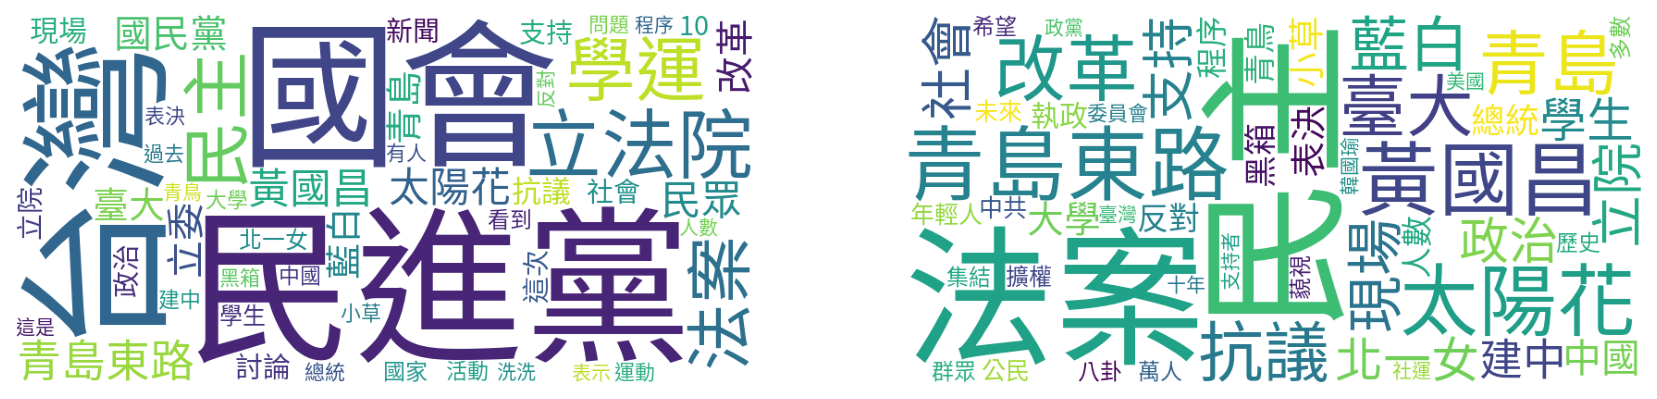

In [10]:
#使用jieba進行斷詞
word_df = df_filtered.assign(word = df_filtered['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)
#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]
#停用字
stopwords = [line.strip() for line in open('./stop_words.txt', 'r', encoding='utf-8').readlines()]
noStop_df = word_df[~word_df['word'].isin(stopwords)]
freq_df = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
FontPath = "./SourceHanSansTW-Regular.otf"
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)


# 參數形式手動加入停用字
stopwords_manual = ["10","20","這次","這是","新聞", "學運", "完整", "運動","有沒有", "討論","洗洗","問題","一起","一定","有人","表示","看到", "立法院", "黨團", "台灣", "民眾", "媒體", "國民黨", "立委",'過去','相關','活動','國會','民進黨','民眾黨','直接','聚集','報導','團體','行動','進行','資料','根本','院會','國家','政府','來源','繼續','一直','參加','時間','昨天','網址','要求','當年','委員','朋友','一堆']
stopwords.extend(stopwords_manual)
# 重新清除停用字
nostop_df_updated = word_df[~word_df['word'].isin(stopwords)]
freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_dict_updated = freq_df_updated.set_index('word').to_dict()
freq_dict_updated = freq_dict_updated['count']
wordcloud_after = WordCloud(background_color='white', width=800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_after.generate_from_frequencies(freq_dict_updated)

## 比較清理前後的文字雲
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_after)
plt.axis('off')

plt.show()

## 情緒代表字

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-7f727dc88a7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nostop_df_updated["artDate"] = pd.to_datetime(nostop_df_updated["artDate"])
<ipython-input-11-7f727dc88a7f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Text(0.5, 1.0, '負向情緒總數')

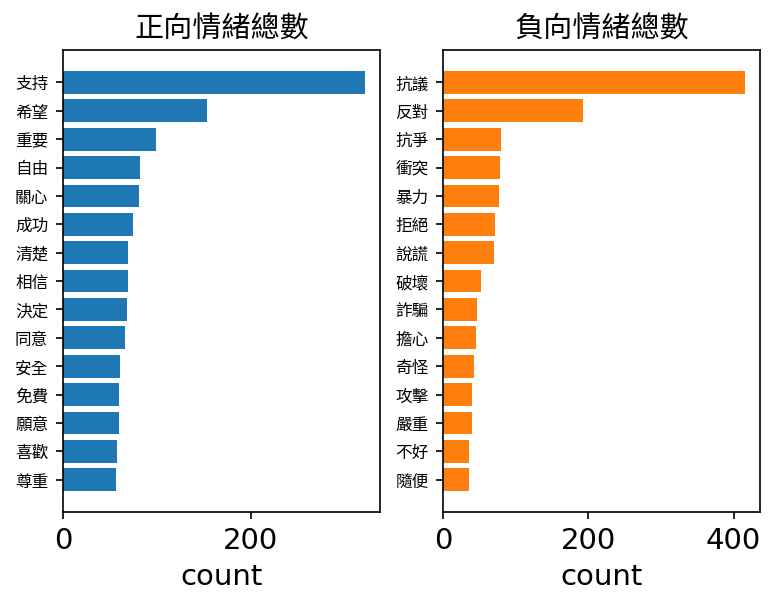

In [11]:
# plt.rcParams['font.sans-serif']=['SimHei'] #使 matplotilb 中文能正常顯示
fprop = fm.FontProperties(fname="./SourceHanSansTW-Regular.otf")
# 讀取情緒字典
liwc_dict = pd.read_csv("./LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})

nostop_df_updated["artDate"] = pd.to_datetime(nostop_df_updated["artDate"])
nostop_df_updated['artDate'] = nostop_df_updated['artDate'].dt.date
# 設定要移除的字詞列表
words_to_remove = ['笑死','爆發','情緒','八卦','朋友','激烈']
# 使用 ~ 運算子和 isin() 方法過濾掉包含在 words_to_remove 列表中的行
liwc_dict_revise = liwc_dict[~liwc_dict['word'].isin(words_to_remove)]
# 使用更新後的情緒字典 merge
ptt_liwc_df_revise = pd.merge(nostop_df_updated[["artUrl", "artDate", "artTitle", "artContent","word"]], liwc_dict_revise, how="left")

word_count = ptt_liwc_df_revise.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1, 2)

colors = ["tab:blue", "tab:orange"]
ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop, fontsize=8)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop, fontsize=8)
ax[1].set_title("負向情緒總數", fontproperties=fprop)


## 情緒分數趨勢圖

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

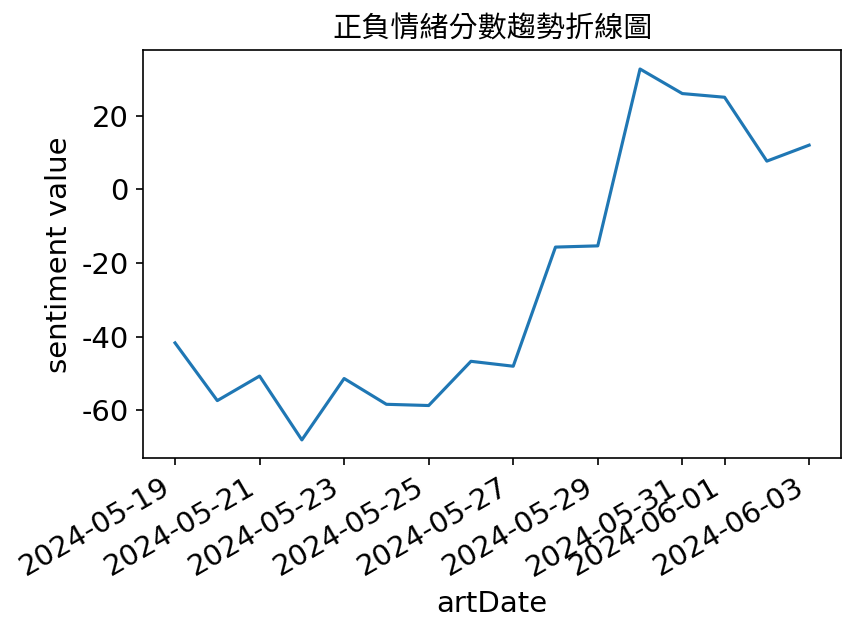

In [12]:
sentiment_count_revise = pd.DataFrame(
    ptt_liwc_df_revise.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count_revise['sentiments'] == "positive") | (sentiment_count_revise['sentiments'] == "negative")
sentiment_count_revise = sentiment_count_revise.loc[mask]

sentiment_count_revise = sentiment_count_revise.rename(columns={0: "size"})
sentiment_count_revise = sentiment_count_revise.sort_values(["artDate"])

ptt_sentiment_value_revise = (
    sentiment_count_revise.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)

# sentiment 計算方式: positive - negative
ptt_sentiment_value_revise["sentiment_value"] = (
    ptt_sentiment_value_revise["positive"]
    - ptt_sentiment_value_revise["negative"]
)

plt.rcParams['axes.unicode_minus'] = False
# 繪製情緒分數趨勢圖
fig, ax = plt.subplots()

rolling_days = 3
ax.plot(ptt_sentiment_value_revise["artDate"], ptt_sentiment_value_revise["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

# 主題模型

In [13]:
clear2_df = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# 移除網址格式
# 只留下中文字
clear2_df["artContent"] = clear2_df["artContent"].str.replace("(http|https)://.*", "", regex=True)
clear2_df["artContent"] = clear2_df["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
clear2_df = clear2_df.loc[:,["artContent", "artUrl", "artCatagory", 'artDate']]  # 文章內容 文章連結

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# 設定繁體中文詞庫
jieba.set_dictionary("./dict.txt.big")
jieba.add_word('黃國昌')
jieba.add_word('民眾黨')
jieba.add_word('民眾')

# 新增stopwords
with open("./stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# 設定斷詞 function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # 篩選掉停用字與字元數大於1的詞彙
    return seg_list

clear2_df["words"] = clear2_df["artContent"].apply(getToken)
clear2_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Building prefix dict from /content/drive/MyDrive/Colab Notebooks/finalproject/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/finalproject/dict.txt.big ...
Loading model from cache /tmp/jieba.ud986385f3da0fa11765fb1e92c54fd0b.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.ud986385f3da0fa11765fb1e92c54fd0b.cache
Loading model cost 1.227 seconds.
DEBUG:jieba:Loading model cost 1.227 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


artContent  \
0  薪水好低別人領萬時我還在領萬現在人家薪水漲到萬了我還在三萬看得我好羨慕我是說我朋友拉天生非凡...   
1  民進黨要演丟個民主香腸拉個布條拍個照三五學生衝個場喊個學運再起配合政論每天討論就算演全套了要...   
2  年的太陽花學運也是在禮拜六日發生今天如果真的過了法案禮拜六日立法院又沒什麼人大學生會趁這時機...   
3  鍾嘉濱其實很可惜可惜在沒有好爸爸沒有跟到好老闆最近大家評論的副秘書長其實不是第一個從龍之功早...   
4       第二次太陽花要來了要來了我等了五個月就是要看這個大場面來吧集結吧大家衝啊抗中保台抗中保台   

                                              artUrl artCatagory  \
0  https://www.ptt.cc/bbs/Gossiping/M.1715904081....   Gossiping   
1  https://www.ptt.cc/bbs/Gossiping/M.1715906498....   Gossiping   
2  https://www.ptt.cc/bbs/Gossiping/M.1715911113....   Gossiping   
3  https://www.ptt.cc/bbs/Gossiping/M.1715935285....   Gossiping   
4  https://www.ptt.cc/bbs/Gossiping/M.1715953050....   Gossiping   

               artDate                                              words  
0  2024-05-17 08:01:19  [薪水, 領萬時, 領萬, 薪水, 漲到, 三萬, 好羨慕, 朋友, 天生, 非凡, 運氣,...  
1  2024-05-17 08:41:36  [民進黨, 要演, 丟個, 民主, 香腸, 拉個, 布條, 拍個, 三五, 學生, 衝個場,...  
2  2024-05-17 09:58:30  [太陽, 學運, 禮拜六, 發生, 過了, 法案, 禮拜六, 立法院, 沒什麼, 大學生, ...  
3  2024-05-17 16:41:22  [嘉濱, 可惜, 可惜, 爸爸, 老闆, 最近, 評論, 秘書長, 第一個, 從龍, 之功,...  
4  2024-05-17 21:37:27     [第二次, 太陽, 要來, 要來, 五個, 場面, 集結, 衝啊抗, 中保, 台抗, 中保]

In [16]:
docs = clear2_df['words'].to_list()
dictionary = Dictionary(docs)
# 過濾出現次數少於5篇文章的字詞，和出現在99%文章以上的字詞
dictionary.filter_extremes(no_below=5, no_above=0.99)
# 將斷詞結果轉成corpus，把每篇文章數字化
corpus = [dictionary.doc2bow(doc) for doc in docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


訓練LDA模型，指定主題數量2~9 之間 並透過perplexity 與 PMI 來評估模型最佳主題數量

In [17]:
t0 = time.time()
topic_num_list = np.arange(2, 10)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()
for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5 # 訓練次數
        )
    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)
    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)

result = pd.DataFrame(result)
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


topic_num   perplexity       pmi
0          2  1617.048962  0.010194
1          3  1611.276379 -0.016439
2          4  1575.168326 -0.009457
3          5  1592.980337 -0.017690
4          6  1581.036223 -0.018278
5          7  1591.473212 -0.016649
6          8  1610.908911 -0.020810
7          9  1628.221945 -0.017619

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

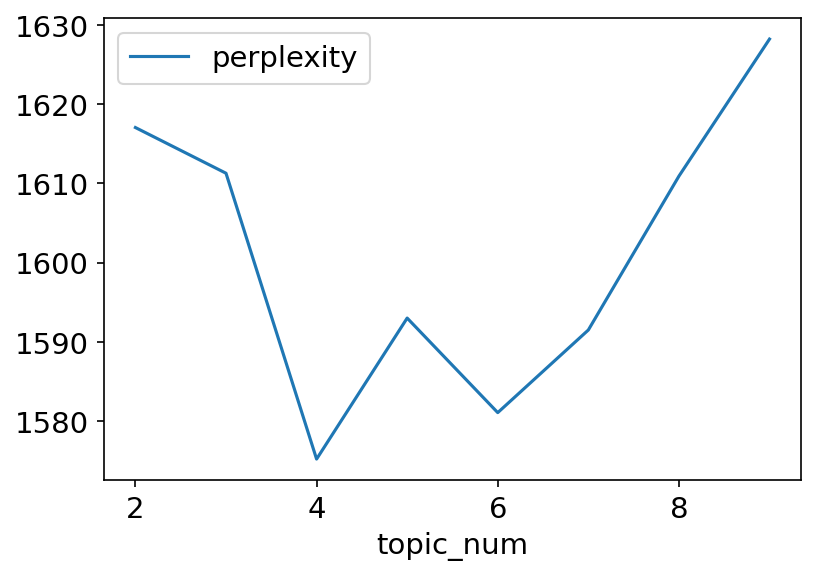

In [18]:
result.plot.line(x='topic_num', y='perplexity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

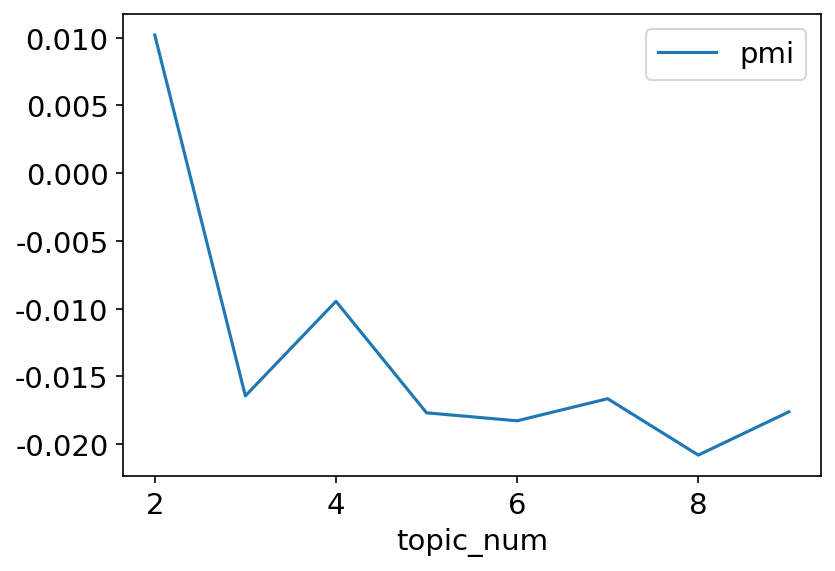

In [19]:
result.plot.line(x='topic_num', y='pmi')

觀察perplexity和pmi的值，選出最佳主題數:4，並視覺化

In [20]:
best_model = LdaModel(
    corpus = corpus,
    num_topics = 4,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # 訓練次數
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(best_model, corpus, dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.113776 -0.024424       1        1  32.119865
1      0.003754  0.038605       2        1  23.943877
3      0.069600 -0.080559       3        1  22.194082
2      0.040422  0.066377       4        1  21.742176, topic_info=      Term         Freq        Total Category  logprob  loglift
658    黃國昌   962.000000   962.000000  Default  30.0000  30.0000
2185    建中   212.000000   212.000000  Default  29.0000  29.0000
1       學運   843.000000   843.000000  Default  28.0000  28.0000
36     立法院  1442.000000  1442.000000  Default  27.0000  27.0000
32      太陽   688.000000   688.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
144   青島東路   107.180239   791.357663   Topic4  -5.5264  -0.4733
414     青島    91.030817   504.585577   Topic4  -5.6898  -0.1866
364     抗議    89.329750   652.365956   Topic4  -5.7086  -0.4624
116     現場    86.500599   549.909866   Topic4  -5.7408  -0.3237
5       立院    81.710412   465.290748   Topic4  -5.7978  -0.2136

[356 rows x 6 columns], token_table=      Topic      Freq Term
term                      
127       1  0.109668   一些
127       2  0.249244   一些
127       3  0.149547   一些
127       4  0.488519   一些
291       1  0.042898   一堆
...     ...       ...  ...
547       4  0.494557   黑箱
3566      1  0.932016   龍大
3566      2  0.028243   龍大
3566      3  0.028243   龍大
3566      4  0.028243   龍大

[860 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

可以看到仍圓圈部分仍部分重疊，且仔細觀察每個主題的詞彙皆有些重複，因此經調整最佳主題數為3

In [21]:
model_3 = LdaModel(
    corpus = corpus,
    num_topics = 3,
    id2word=dictionary,
    random_state = 1500,
    passes = 5 # 訓練次數
    )
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model_3, corpus, dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.094173  0.011208       1        1  39.746201
1      0.030886 -0.054470       2        1  31.125706
2      0.063287  0.043262       3        1  29.128094, topic_info=     Term         Freq        Total Category  logprob  loglift
658   黃國昌   971.000000   971.000000  Default  30.0000  30.0000
1      學運   845.000000   845.000000  Default  29.0000  29.0000
32     太陽   689.000000   689.000000  Default  28.0000  28.0000
36    立法院  1440.000000  1440.000000  Default  27.0000  27.0000
2185   建中   219.000000   219.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
23     法案   175.090410  1033.146896   Topic3  -5.3281  -0.5416
211    國會   179.343014  1605.169046   Topic3  -5.3041  -0.9582
14     學生   115.599339   361.475922   Topic3  -5.7433   0.0934
36    立法院   162.687358  1440.214615   Topic3  -5.4016  -0.9473
5      立院   109.148792   464.515460   Topic3  -5.8007  -0.2148

[283 rows x 6 columns], token_table=      Topic      Freq Term
term                      
291       1  0.120342   一堆
291       2  0.612650   一堆
291       3  0.273505   一堆
952       2  0.841220  一大步
1079      1  0.197434   一直
...     ...       ...  ...
2535      1  0.910752   點半
2535      2  0.082796   點半
3566      1  0.935855   龍大
3566      2  0.028359   龍大
3566      3  0.028359   龍大

[582 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [22]:
model_3.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.020*"立法院" + 0.017*"國會" + 0.012*"民進黨" + 0.010*"法案" + 0.010*"民主" + 0.010*"台灣" + 0.010*"民眾" + 0.009*"立委" + 0.007*"國民黨" + 0.007*"抗議"'),
 (1,
  '0.015*"國會" + 0.012*"台灣" + 0.010*"改革" + 0.009*"學運" + 0.009*"法案" + 0.009*"民進黨" + 0.008*"立法院" + 0.007*"民主" + 0.007*"青島東路" + 0.006*"太陽"'),
 (2,
  '0.021*"黃國昌" + 0.015*"民進黨" + 0.012*"學運" + 0.010*"太陽" + 0.010*"台灣" + 0.007*"國民黨" + 0.006*"青島東路" + 0.006*"民主" + 0.005*"青島" + 0.005*"立委"')]


**主題1 (法案本身)**
*    立法院, 國會, 法案, 民主, 改革, 抗議, 表決, 改革, 討論

**主題2 (青島遊行)**
*    學運, 青島, 青島東路, 台灣, 太陽(花), 大學, 建中, 學生, 現場, 抗議


**主題3 (政黨)**
* 黃國昌, 民進黨, 台灣, 國民黨, 立委, 藍白, 民眾黨, 國民黨, 民主, 抗議, 改革

資料集內提及民進黨的比例遠高於藍白兩黨，推測為PTT較多網友在批評民進黨，因此經常提到


In [23]:
# 取得每條新聞的主題分佈
topics_doc = model_3.get_document_topics(corpus)
m_theta = corpus2csc(topics_doc).T.toarray()
clear2_df['topic_label'] = m_theta.argmax(axis=1) + 1
clear2_df['topic_label'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_label
3    832
2    690
1    301
Name: count, dtype: int64

數量最多的為主題3，次多的為主題2，最少的為主題1


In [24]:
clear2_df['artDate'] = pd.to_datetime(clear2_df['artDate'], errors='coerce')
clear2_df['artDate']=clear2_df['artDate'].dt.date
clear2_df.head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artContent  \
0   薪水好低別人領萬時我還在領萬現在人家薪水漲到萬了我還在三萬看得我好羨慕我是說我朋友拉天生非凡...   
1   民進黨要演丟個民主香腸拉個布條拍個照三五學生衝個場喊個學運再起配合政論每天討論就算演全套了要...   
2   年的太陽花學運也是在禮拜六日發生今天如果真的過了法案禮拜六日立法院又沒什麼人大學生會趁這時機...   
3   鍾嘉濱其實很可惜可惜在沒有好爸爸沒有跟到好老闆最近大家評論的副秘書長其實不是第一個從龍之功早...   
4        第二次太陽花要來了要來了我等了五個月就是要看這個大場面來吧集結吧大家衝啊抗中保台抗中保台   
5   上一次學運成員不是吃香就是喝辣今天晚上的大戲職業學生是不是等很久了要出名發財就等這波了嗎還有...   
6   安安魯蛇我看維基百科的林飛帆獲獎部分有個社會科學院的社會利他獎如上圖現在去現場馬上自稱領袖照...   
7   聽說青島東路夜市又開了雖然說規模比之前的小很多很多但好歹也是十年一遇的市集應該還是會有一些愛...   
8   真的覺得民進黨的媒體洗腦有夠誇張早上下午的襲警打人性騷搶劫荒唐四部曲晚上派幾個衝組男立委不管...   
9   剛剛看新聞已經有學生在立法院門口集結了想請問作為學運大前輩的林飛帆學長今天怎麼好像沒什麼動靜...   
10  媒體來源新頭殼記者署名金大鈞綜合報導完整新聞標題斥藍白強行通過國會改革法學運起家的時代力量發...   
11  稍微看了一下直播幹為什麼一堆休學中輟或是三十幾歲的人這算哪門子的學生其中還有一個人妻是自己來...   
12  笑死當年太陽花有多少人現在又剩多少人把未來的信用一次性玩掉還以為可以靠媒體亂吹來顛倒是非來維...   
13     欸欸我阿肥啦這算在的中國紅人了人好像在日本立場感覺很符合咱們偉大的黨耶他是不是不用回祖國了卦   
14  中央社立院審國會改革法案場外近百民眾聚集要求停止表決實質審查中央社記者陳俊華林敬殷台北日電立...   
15  真的好不容易大腸花第二開始了當初在大腸花中建立豐功偉業的現在爽領萬真是值得讓人學習寫入教科書...   
16  目前青島東封起來了現場人數目測有人以上越來越多人聚集會變成什麼樣子真的不太好說補圖要推沒有王...   
17  我堅決擁護台灣價值徹底支持沒有討論不是民主我力挺現場的黑熊部隊與協作台派們死守陣地我建議最好...   
18  立院挑戰夜戰拚國會改革三讀青年聚集院外喊停止開會中央廣播電台劉玉秋採訪立法院會今天日處理國會...   
19  剛剛我朋友傳訊息給我說被加進立法院之夜的群組裡面的人正在號召前進青島東路抗議靠北太快了吧馬上...   
20  國會改革法釀大亂鬥綠委藍委掛彩送醫記者楊沛緰攝影吳俊緯許峯瑜報導發佈時間最後更新時間為審查國...   
21  這就是我為什麼度籃這群太陽花學運的背骨仔尤其是那個薪水跟弗利札一樣三段半身的垃圾公子講直接一...   
22         如題上次立院被攻破史稱太陽花學運這次約多名學生集合在外面抗議跟唱歌未來會怎麼形容事件   
23  好像在哪裡看過相似的記得有很多人說當年站出來挺太陽花學運不是反服貿而是反黑箱我就很納悶如果當...   
24  欸欸之前在網路上有看到鄉民說當年去太陽花學運時有種慷慨赴義的感覺出發前她還特別寫了遺書啊我出...   
25  是這樣啦剛剛看到有徵才資訊等等準備要去中山南路青島東路那附近面試了聽主管說表現得好有機會月薪...   
26     上次佔很大因素無論烙狼還是物質募集很快散佈出去也很快得到回應這次若沒有低卡支持學運搞不起來吧   
27  備註請放最後面違者新聞文章刪除媒體來源自由時報記者署名李文馨完整新聞標題學生民眾聚集立院前抗...   
28  本武下午去書局的時候看到不少組看起來蠻年輕的男男女女在擺放筆的貨架前討論要買幾隻筆準備考試還...   
29  媒體來源壹蘋新聞網記者署名蘇柏銓完整新聞標題青年包圍立院怒嗆黃國昌出來面對北市特勤帶甩棍束帶...   

                                               artUrl artCatagory     artDate  \
0   https://www.ptt.cc/bbs/Gossiping/M.1715904081....   Gossiping  2024-05-17   
1   https://www.ptt.cc/bbs/Gossiping/M.1715906498....   Gossiping  2024-05-17   
2   https://www.ptt.cc/bbs/Gossiping/M.1715911113....   Gossiping  2024-05-17   
3   https://www.ptt.cc/bbs/Gossiping/M.1715935285....   Gossiping  2024-05-17   
4   https://www.ptt.cc/bbs/Gossiping/M.1715953050....   Gossiping  2024-05-17   
5   https://www.ptt.cc/bbs/Gossiping/M.1715954177....   Gossiping  2024-05-17   
6   https://www.ptt.cc/bbs/Gossiping/M.1715954987....   Gossiping  2024-05-17   
7   https://www.ptt.cc/bbs/Gossiping/M.1715955328....   Gossiping  2024-05-17   
8   https://www.ptt.cc/bbs/Gossiping/M.1715956853....   Gossiping  2024-05-17   
9   https://www.ptt.cc/bbs/Gossiping/M.1715957860....   Gossiping  2024-05-17   
10  https://www.ptt.cc/bbs/Gossiping/M.1715957945....   Gossiping  2024-05-17   
11  https://www.ptt.cc/bbs/Gossiping/M.1715958059....   Gossiping  2024-05-17   
12  https://www.ptt.cc/bbs/Gossiping/M.1715958064....   Gossiping  2024-05-17   
13  https://www.ptt.cc/bbs/Gossiping/M.1715958070....   Gossiping  2024-05-17   
14  https://www.ptt.cc/bbs/Gossiping/M.1715958386....   Gossiping  2024-05-17   
15  https://www.ptt.cc/bbs/Gossiping/M.1715958432....   Gossiping  2024-05-17   
16  https://www.ptt.cc/bbs/Gossiping/M.1715958679....   Gossiping  2024-05-17   
17  https://www.ptt.cc/bbs/Gossiping/M.1715959051....   Gossiping  2024-05-17   
18  https://www.ptt.cc/bbs/Gossiping/M.1715959078....   Gossiping  2024-05-17   
19  https://www.ptt.cc/bbs/Gossiping/M.1715960133....   Gossiping  2024-05-17   
20  https://www.ptt.cc/bbs/Gossiping/M.1715960343....   Gossiping  2024-05-17   
21  https://www.ptt.cc/bbs/Gossiping/M.1715960964....   Gossiping  2024-05-17   
22  https://www.ptt.cc/bbs/Gossiping/M.1715961148....   Gossiping  2024-05-17   
23  https://www.ptt.cc/bbs/Gossiping/M.1715961624....   Gossiping  2024-05-18   
24  https://www.ptt.cc/bbs/Gossiping/M.1715961682....   Gossiping  2024-05-18   
25  https://www.ptt.cc/bbs/Gossiping/M.1715962054....   Gossiping  2024-05-18   
26  https://www.ptt.cc/bbs/Gossiping/M.1715962566....   Gossiping  2024-05-18   
27  htt

In [25]:
label_3=clear2_df[clear2_df['topic_label']==3]
date = pd.to_datetime('2024-06-01').date()
label_4=label_3[label_3['artDate']==date]
label_4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artContent  \
1108  民進黨花這麼多的錢找一群精蟲衝腦的乞丐去青島東聯誼聚餐結果衝進去也尷尬不衝又只能看著法案通過...   
1109  記得上週二晚上青島東路突然開趴各種懶人包和圖文在社群一直洗台灣已經好幾年沒有這種超大型活動了...   
1110  黃國昌遭撤獎蘇巧慧諷只在直播享受同溫層喝采很可悲記者陳佩君台北報導北美洲台灣人教授協會譴責民...   
1111  這樣就叫負責任啊現在上任都還沒一個月耶只是說不會重啟核電就稱讚負責任難道是因為民進黨過去翻臉...   
1112             看到青鳥的是用臺灣藍鵲這就是藍鳥阿所以青鳥學運可以改叫懶叫學運對吧懶叫覺青們   
1113   最近小黃來臺各家大佬寧夏夜市聚餐最近又有青島東路趴體今天孫又被爆出事我們子交哥是不是安全下莊了呢   
1114  恭喜青鳥行動所有小鳥大翻車有沒有很搞笑啊睽違多年的學運最後徹底被自己人翻車被自己人認證平民不...   
1802  從選後開始麥寮崩潰青島爆滿民眾黨支持度砍半年輕人變回頭草八卦版主功不可沒本來八卦還會演一下還...   
1804  很多人很可愛看不懂這場政治表演一堆人喊不衝有什麼用本來民進黨辦這場青島造勢早就知道法案一定會...   
1805  你這話就說得奇怪了自我有記憶以來還沒看過那一款線上遊戲是活人打敗機器人把工作室開的外掛狗機器...   
1806  去年的月日黃國昌跟館長陳之漢在凱道造勢號稱公平正義大遊行今年的月日是這屆立法院第會期最後一天...   

                                                 artUrl   artCatagory  \
1108  https://www.ptt.cc/bbs/Gossiping/M.1717191552....     Gossiping   
1109  https://www.ptt.cc/bbs/Gossiping/M.1717217838....     Gossiping   
1110  https://www.ptt.cc/bbs/Gossiping/M.1717219089....     Gossiping   
1111  https://www.ptt.cc/bbs/Gossiping/M.1717223557....     Gossiping   
1112  https://www.ptt.cc/bbs/Gossiping/M.1717232288....     Gossiping   
1113  https://www.ptt.cc/bbs/Gossiping/M.1717253402....     Gossiping   
1114  https://www.ptt.cc/bbs/Gossiping/M.1717255460....     Gossiping   
1802  https://www.ptt.cc/bbs/HatePolitics/M.17172033...  HatePolitics   
1804  https://www.ptt.cc/bbs/HatePolitics/M.17172392...  HatePolitics   
1805  https://www.ptt.cc/bbs/HatePolitics/M.17172510...  HatePolitics   
1806  https://www.ptt.cc/bbs/HatePolitics/M.17172544...  HatePolitics   

         artDate                                              words  \
1108  2024-06-01  [民進黨, 一群, 精蟲, 衝腦, 乞丐, 青島, 聯誼, 聚餐, 衝進去, 尷尬, 不衝,...   
1109  2024-06-01  [上週二, 晚上, 青島東路, 突然, 懶人, 圖文, 社群, 一直, 洗台灣, 好幾年, ...   
1110  2024-06-01  [黃國昌, 撤獎, 蘇巧慧諷, 直播, 享受, 同溫層, 喝采, 可悲, 佩君, 台北, 北...   
1111  2024-06-01  [負責, 上任, 都還沒, 一個月, 重啟, 核電, 稱讚, 負責, 民進黨, 過去, 翻臉...   
1112  2024-06-01          [看到, 青鳥, 臺灣, 藍鵲, 藍鳥, 青鳥, 學運, 改叫, 學運, 覺青們]   
1113  2024-06-01  [最近, 小黃來, 各家, 大佬, 寧夏, 夜市, 聚餐, 最近, 青島東路, 趴體, 孫又...   
1114  2024-06-01  [恭喜, 青鳥, 行動, 所有, 小鳥, 翻車, 有沒有, 搞笑, 睽違, 多年, 學運, ...   
1802  2024-06-01  [從選, 崩潰, 青島, 爆滿, 民眾黨, 支持, 年輕人, 回頭草, 八卦, 版主, 功不...   
1804  2024-06-01  [可愛, 看不懂, 這場, 政治, 表演, 一堆, 人喊, 不衝, 民進黨, 這場, 青島,...   
1805  2024-06-01  [這話, 奇怪, 自我, 記憶, 以來, 還沒, 看過, 一款, 線上, 遊戲, 活人, 打...   
1806  2024-06-01  [去年, 黃國昌, 館長, 之漢, 凱道, 造勢, 號稱, 公平正義, 遊行, 今年, 這屆...   

      topic_label  
1108            3  
1109            3  
1110            3  
1111            3  
1112            3  
1113            3  
1114            3  
1802            3  
1804            3  
1805            3  
1806            3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


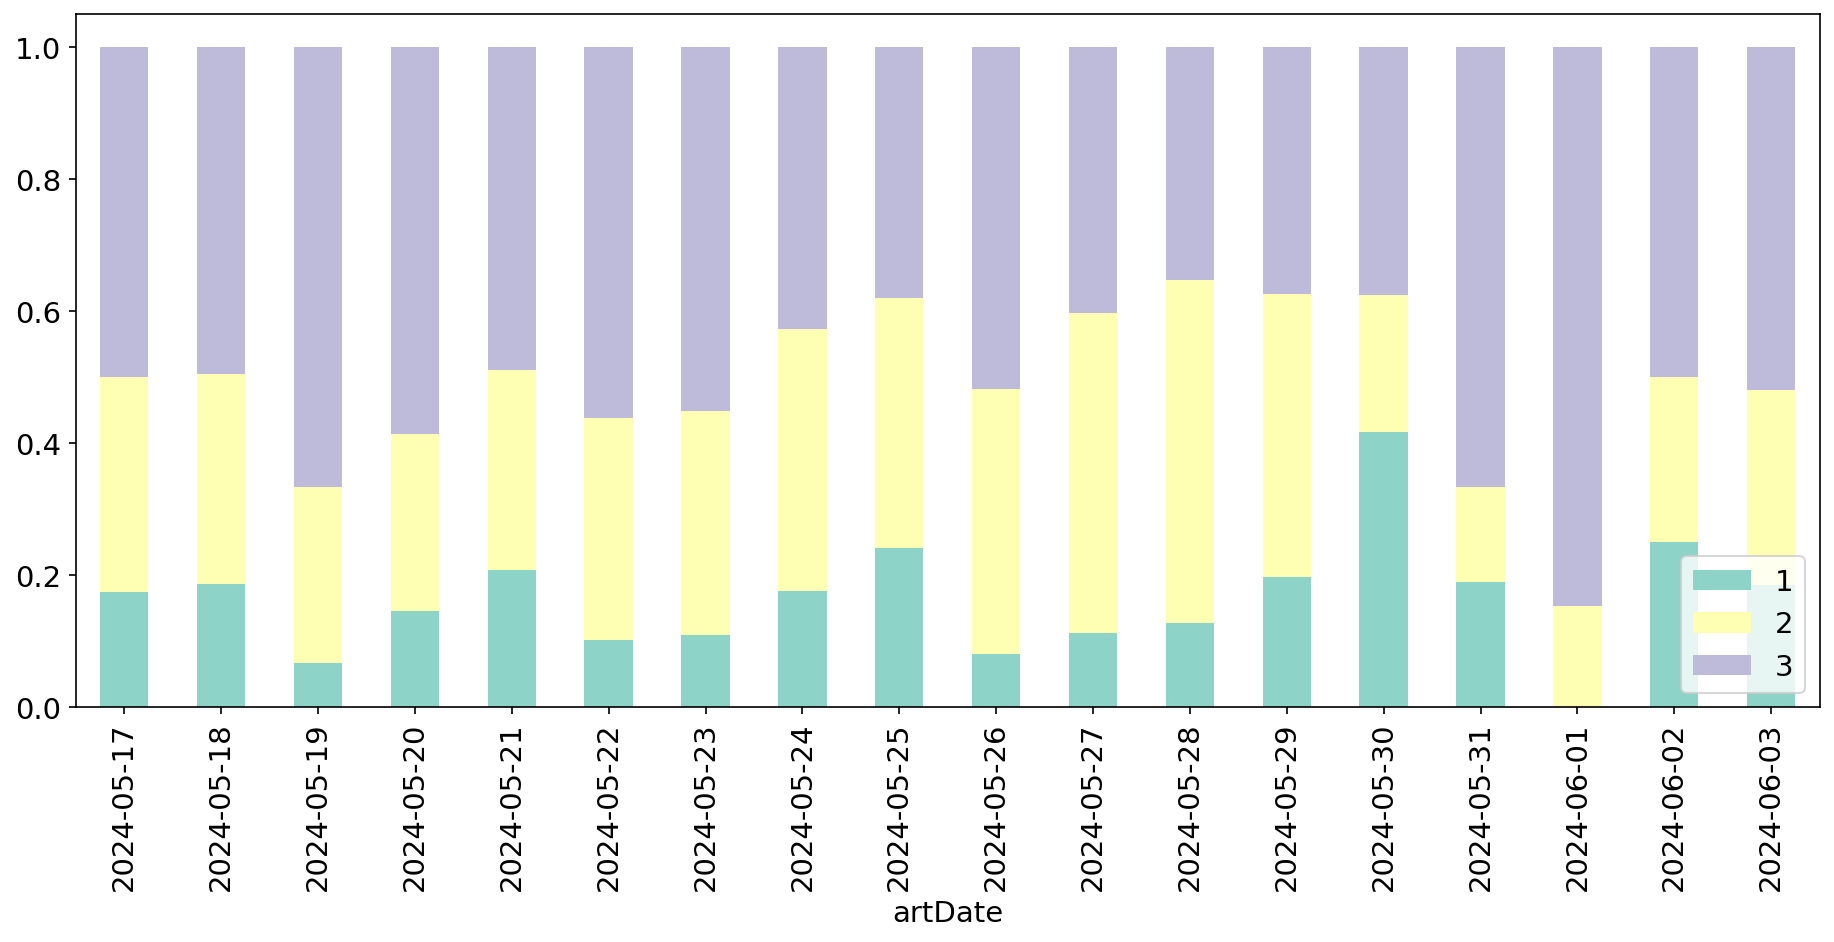

In [28]:
clear2_df['artDate'] = pd.to_datetime(clear2_df['artDate'])
date_topic = clear2_df.groupby(clear2_df['artDate'].dt.date)['topic_label'].value_counts(normalize=True).unstack()
fig, ax = plt.subplots(figsize=(15,6))
date_topic.plot.bar(ax=ax, stacked=True, color = plt.cm.Set3.colors)
ax.legend(loc='lower right')

5/28 討論主題2(青島學運)的文章比例占最高，追溯日期原來為當天法案三讀通過，反對者在立法院外以及全台發起串聯活動，青島東路晚間人數更達到7萬人

*   5/28 討論主題2(青島學運)的文章比例占最高，追溯日期原來為當天法案三讀通過，反對者在立法院外以及全台發起串聯活動，青島東路晚間人數更達到7萬人
*   6/1這天主題3(政黨)的討論度非常高進一步抓出來查看文章,發現藍綠支持者在互罵





---



#LLM Information Extraction

## HuggingFace Token

In [29]:
HUGGINGFACEHUB_API_TOKEN = getpass()
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


··········


##huggingfaceEndpoint



In [30]:
llm = HuggingFaceEndpoint(
    repo_id="google/gemma-1.1-7b-it", temperature=1.0,model_kwargs={'token':HUGGINGFACEHUB_API_TOKEN, 'use_cache':False}
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFaceEndpoint` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEndpoint`.
  warn_deprecated(


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [31]:
#隨機抓取100筆資料做LLM模型分析
df_filtered=df_filtered.sample(n=100,random_state=222)
df_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
31420  https://www.ptt.cc/bbs/HatePolitics/M.17170620...   
27343  https://www.ptt.cc/bbs/HatePolitics/M.17167334...   
27149  https://www.ptt.cc/bbs/HatePolitics/M.17167118...   
9033   https://www.ptt.cc/bbs/Gossiping/M.1716557415....   
5380   https://www.ptt.cc/bbs/Gossiping/M.1716356648....   
...                                                  ...   
6021   https://www.ptt.cc/bbs/Gossiping/M.1716393219....   
22366  https://www.ptt.cc/bbs/HatePolitics/M.17163415...   
25883  https://www.ptt.cc/bbs/HatePolitics/M.17165960...   
23993  https://www.ptt.cc/bbs/HatePolitics/M.17164765...   
987    https://www.ptt.cc/bbs/Gossiping/M.1716010791....   

                             artTitle              artDate  \
31420                 [黑特]全黨救一人，救救憨川。  2024-05-30 17:40:47   
27343        Re:[討論]一直洗社運妹去捉i的意義在哪裡呀?  2024-05-26 22:23:57   
27149               [討論]10萬抗中青年沒人要當兵？  2024-05-26 16:24:13   
9033           Re:[爆卦]青島東路現場說已經有八萬五千人  2024-05-24 21:30:13   
5380         Re:[新聞]親臨立院反國會改革抗議現場　漂浪島  2024-05-22 13:44:06   
...                               ...                  ...   
6021               Re:[問卦]男友選小草窮困又潦倒？  2024-05-22 23:53:36   
22366         [新聞]立院21日審國會職權修法二讀通過21條  2024-05-22 09:32:07   
25883                 [新聞]國會聽證調查權二讀通過  2024-05-25 08:14:12   
23993        [新聞]「太陽花是場騙局」十年前318學生不忍了  2024-05-23 23:02:37   
987    [新聞]國會職權修法舉手表決遭疑瑕疵黃國昌：民進黨想癱瘓議事  2024-05-18 13:39:45   

                                              artContent             artdate  \
31420  這次風波實在諷刺\n\n外頭動員來的黨工、學生\n淋雨\n熬夜\n嘶吼\n被醫院罵\n被網路... 2024-05-31 01:50:50   
27343  就劍走偏鋒啊\n\n既然政治上贏不了、法律上贏不了\n\n就尋求道德門啊\n\n\n王八千事... 2024-05-27 01:56:09   
27149  侯漢廷去青島東號召10萬青年當兵抗中保台\n\n結果沒人報名\n\n10萬青年不當兵要怎麼抗... 2024-05-27 01:54:58   
9033   印象中\n\n歷史上上次這種該國執政黨直接糾結該國年輕群眾，號召全國串連進入首都的狀況\n\... 2024-05-26 01:36:08   
5380   我大概是2013年洪仲秋事件開始上街頭\nhttps://i.imgur.com/cP4qM... 2024-05-23 01:39:41   
...                                                  ...                 ...   
6021   完全不意外。\n\n您6成綠女裡面大概95%以上是文組的，簡單分為：文組廢系&文組好系廢材。... 2024-05-23 01:47:53   
22366  1.新聞網址︰\nhttps://www.cna.com.tw/news/aipl/2024... 2024-05-23 02:01:15   
25883  1.新聞網址︰\nhttps://www.chinatimes.com/newspapers... 2024-05-27 01:49:57   
23993  1.新聞網址︰\nhttps://tinyurl.com/4wkucas2\n2.新聞來源︰... 2024-05-24 02:06:30   
987    1.媒體來源:\n中央通訊社\n\n2.記者署名:\n中央社記者郭建伸台北18日電\n\n3... 2024-05-19 01:51:56   

                                   sentence  
31420        隨著網路電信公司任何一家都撒手不管他本人又嘴硬不肯說自己唬爛  
27343                                我母校台師大  
27149                 只要在立院搞抗爭喊口號吃便當就可以台獨了喔  
9033               差別在於當初中國文革是因為毛澤東擔心失去他的權力  
5380                               到現在三黨不過半  
...                                     ...  
6021                                 8年也該醒了  
22366                          在立委行使人事同意權部分  
25883                       只要雙方都在合法合憲的前提之下  
23993  相較現在立院外明擺甘做有權勢者打擊威脅在野黨馬前卒仍理直氣壯的綠色幼蟲們  
987                       民進黨立委一直質疑舉手表決是人大化  

[100 rows x 6 columns]

In [32]:
class doc(BaseModel):
    政黨傾向: str = Field(..., description="判斷整個句子總體的政黨傾向。", enum=["綠色", "藍色白色"])
    情緒: str = Field(
        ...,
        description="判斷出句子整體的情緒如何,",enum=["負向","中性","正向"]
    )
    提到的人物: str = Field(
        ...,
        description="列出句子中提到的人物並以逗號','分隔。"

    )
doc_parser = JsonOutputParser(pydantic_object=doc)

# 透過 get_format_instructions() 可以看到如何告訴 LLM 生成我們想要的格式的一些指令
doc_parser.get_format_instructions()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"\\u653f\\u9ee8\\u50be\\u5411": {"title": "\\u653f\\u9ee8\\u50be\\u5411", "description": "\\u5224\\u65b7\\u6574\\u500b\\u53e5\\u5b50\\u7e3d\\u9ad4\\u7684\\u653f\\u9ee8\\u50be\\u5411\\u3002", "enum": ["\\u7da0\\u8272", "\\u85cd\\u8272\\u767d\\u8272"], "type": "string"}, "\\u60c5\\u7dd2": {"title": "\\u60c5\\u7dd2", "description": "\\u5224\\u65b7\\u51fa\\u53e5\\u5b50\\u6574\\u9ad4\\u7684\\u60c5\\u7dd2\\u5982\\u4f55,", "enum": ["\\u8ca0\\u5411", "\\u4e2d\\u6027", "\\u6b63\\u5411"], "type": "string"}, "\\u63d0\\u5230\\u7684

In [33]:
# Set up a parser + inject instructions into the prompt template.
doc_parser = JsonOutputParser(pydantic_object=doc)\

doc_template = """<start_of_turn>user
你是一位新聞評論員，你將會閱讀網路上的新聞，請抓取出新聞中：
1. 此新聞的政黨傾向，綠色或藍色白色
2. 此新聞的情緒，負向或中性或正向
3. 提到的人物，例如：黃國昌,韓國瑜

以下為一些範例：
```
範例1
句子：豬哥亮沒有死,死的是2014的黃國昌
抓取結果：{{
    "政黨傾向":"綠色",
    "情緒":"負向",
    "提到的人物":"黃國昌"
}}

範例2
句子：在立院吃便當搞抗爭就可以台獨了喔
抓取結果：{{
   "政黨傾向":"藍色白色"
    "情緒":"負向",
    "提到的人物":"無"
}}

範例3
句子：立法院的法案印象中沒有過這麼多律師反對過，藍白真的有夠丟臉餒！立個法搞到人人喊打，有點可憐
抓取結果：{{
     "政黨傾向":"綠色",
    "情緒":"負向",
    "提到的人物":"無"
}}

範例4
句子：韓國瑜院長您辛苦了,由衷敬佩
抓取結果：{{
    "政黨傾向":"藍色白色",
    "情緒":"正向",
    "提到的人物":"韓國瑜"
}}
範例5
句子：我們還是要感謝藍白的白痴們
抓取結果：{{
    "政黨傾向":"綠色",
    "情緒":"中性",
    "提到的人物":"無"
}}
範例6
句子：連讓我們反對討論的機會都沒有的國會改革
抓取結果：{{
    "政黨傾向":"綠色",
    "情緒":"負向",
    "提到的人物":"無"
}}
範例7
句子：綠色就最愛搞這種網軍
抓取結果：{{
    "政黨傾向":"藍色白色",
    "情緒":"中性",
    "提到的人物":"無"
}}
{format_instructions}
請使用繁體中文回答。
除了 JSON 內容外，不要回答任何其他內容

現在請幫我抓取以下句子的資訊：
句子：{query}
抓取結果：<end_of_turn>
<start_of_turn>model
"""
doc_prompt = PromptTemplate(
    template=doc_template,
    # template="Answer the user query.\n{format_instructions}\nDon't output any other explanation\n{query}\n",
    input_variables=["query"],
    # 將 format_instructions 也輸入到 prompt templete 中
    partial_variables={"format_instructions": doc_parser.get_format_instructions()},
)
chain = doc_prompt | llm
chain.get_graph().print_ascii()

       +-------------+         
       | PromptInput |         
       +-------------+         
              *                
              *                
              *                
      +----------------+       
      | PromptTemplate |       
      +----------------+       
              *                
              *                
              *                
   +---------------------+     
   | HuggingFaceEndpoint |     
   +---------------------+     
              *                
              *                
              *                
+---------------------------+  
| HuggingFaceEndpointOutput |  
+---------------------------+  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# 從 json 字串中抓取答案
def extract_answer_from_string(string_):
    # print("原始字符串:", repr(string_))  # 打印原始字符串
    string_ = string_.replace("\n", "")
    string_ = string_.replace("json", "")
    string_ = string_.replace("    ", "")
    string_ = string_.replace("```", "")
    # print("清理後的字符串:", repr(string_))  # 打印清理後的字符串
    try:
        # 可以成功轉換
        dict_result = json.loads(string_)
    except:

        print(string_)
        return string_
    return dict_result

# 從 dict 抓取情緒
def get_sentiment(row):
    sentiment = None
    if isinstance(row, dict):
        if ("政黨傾向" in row.keys()):
            sentiment = row['政黨傾向']
        else:
            print("字典中沒有 '情緒' 這個鍵。")
    else:
      print("輸入的不是字典。")
    return sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
llm_result = extract_answer_from_string(chain.invoke({"query": "黃國昌是騙子"}))
print(llm_result)
get_sentiment(llm_result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '黃國昌'}


'綠色'

In [36]:
df_filtered['LLM'] = df_filtered.apply(lambda x: extract_answer_from_string(chain.invoke({"query": x['sentence']})), axis=1)
df_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The provided text does not include the actual news sentence or any relevant information to extract the requested data, so I am unable to extract the requested data from the given context.


artUrl  \
31420  https://www.ptt.cc/bbs/HatePolitics/M.17170620...   
27343  https://www.ptt.cc/bbs/HatePolitics/M.17167334...   
27149  https://www.ptt.cc/bbs/HatePolitics/M.17167118...   
9033   https://www.ptt.cc/bbs/Gossiping/M.1716557415....   
5380   https://www.ptt.cc/bbs/Gossiping/M.1716356648....   
...                                                  ...   
6021   https://www.ptt.cc/bbs/Gossiping/M.1716393219....   
22366  https://www.ptt.cc/bbs/HatePolitics/M.17163415...   
25883  https://www.ptt.cc/bbs/HatePolitics/M.17165960...   
23993  https://www.ptt.cc/bbs/HatePolitics/M.17164765...   
987    https://www.ptt.cc/bbs/Gossiping/M.1716010791....   

                             artTitle              artDate  \
31420                 [黑特]全黨救一人，救救憨川。  2024-05-30 17:40:47   
27343        Re:[討論]一直洗社運妹去捉i的意義在哪裡呀?  2024-05-26 22:23:57   
27149               [討論]10萬抗中青年沒人要當兵？  2024-05-26 16:24:13   
9033           Re:[爆卦]青島東路現場說已經有八萬五千人  2024-05-24 21:30:13   
5380         Re:[新聞]親臨立院反國會改革抗議現場　漂浪島  2024-05-22 13:44:06   
...                               ...                  ...   
6021               Re:[問卦]男友選小草窮困又潦倒？  2024-05-22 23:53:36   
22366         [新聞]立院21日審國會職權修法二讀通過21條  2024-05-22 09:32:07   
25883                 [新聞]國會聽證調查權二讀通過  2024-05-25 08:14:12   
23993        [新聞]「太陽花是場騙局」十年前318學生不忍了  2024-05-23 23:02:37   
987    [新聞]國會職權修法舉手表決遭疑瑕疵黃國昌：民進黨想癱瘓議事  2024-05-18 13:39:45   

                                              artContent             artdate  \
31420  這次風波實在諷刺\n\n外頭動員來的黨工、學生\n淋雨\n熬夜\n嘶吼\n被醫院罵\n被網路... 2024-05-31 01:50:50   
27343  就劍走偏鋒啊\n\n既然政治上贏不了、法律上贏不了\n\n就尋求道德門啊\n\n\n王八千事... 2024-05-27 01:56:09   
27149  侯漢廷去青島東號召10萬青年當兵抗中保台\n\n結果沒人報名\n\n10萬青年不當兵要怎麼抗... 2024-05-27 01:54:58   
9033   印象中\n\n歷史上上次這種該國執政黨直接糾結該國年輕群眾，號召全國串連進入首都的狀況\n\... 2024-05-26 01:36:08   
5380   我大概是2013年洪仲秋事件開始上街頭\nhttps://i.imgur.com/cP4qM... 2024-05-23 01:39:41   
...                                                  ...                 ...   
6021   完全不意外。\n\n您6成綠女裡面大概95%以上是文組的，簡單分為：文組廢系&文組好系廢材。... 2024-05-23 01:47:53   
22366  1.新聞網址︰\nhttps://www.cna.com.tw/news/aipl/2024... 2024-05-23 02:01:15   
25883  1.新聞網址︰\nhttps://www.chinatimes.com/newspapers... 2024-05-27 01:49:57   
23993  1.新聞網址︰\nhttps://tinyurl.com/4wkucas2\n2.新聞來源︰... 2024-05-24 02:06:30   
987    1.媒體來源:\n中央通訊社\n\n2.記者署名:\n中央社記者郭建伸台北18日電\n\n3... 2024-05-19 01:51:56   

                                   sentence  \
31420        隨著網路電信公司任何一家都撒手不管他本人又嘴硬不肯說自己唬爛   
27343                                我母校台師大   
27149                 只要在立院搞抗爭喊口號吃便當就可以台獨了喔   
9033               差別在於當初中國文革是因為毛澤東擔心失去他的權力   
5380                               到現在三黨不過半   
...                                     ...   
6021                                 8年也該醒了   
22366                          在立委行使人事同意權部分   
25883                       只要雙方都在合法合憲的前提之下   
23993  相較現在立院外明擺甘做有權勢者打擊威脅在野黨馬前卒仍理直氣壯的綠色幼蟲們   
987                       民進黨立委一直質疑舉手表決是人大化   

                                                     LLM  
31420         {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}  
27343         {'政黨傾向': '藍色白色', '情緒': '中性', '提到的人物': '無'}  
27149         {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}  
9033           {'政黨傾向': '無', '情緒': '負向', '提到的人物': '毛澤東'}  
5380          {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}  
...                                                  ...  
6021          {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}  
22366         {'政黨傾向': '藍色白色', '情緒': '中性', '提到的人物': '無'}  
25883           {'政黨傾向': '中性', '情緒': '中性', '提到的人物': '無'}  
23993  {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '馬前卒', '綠色...  
987             {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '無'}  

[100 rows x 7 columns]

In [37]:
df_filtered['political']=df_filtered.apply(lambda x:get_sentiment(x['LLM']),axis=1)
df_filtered

輸入的不是字典。


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
31420  https://www.ptt.cc/bbs/HatePolitics/M.17170620...   
27343  https://www.ptt.cc/bbs/HatePolitics/M.17167334...   
27149  https://www.ptt.cc/bbs/HatePolitics/M.17167118...   
9033   https://www.ptt.cc/bbs/Gossiping/M.1716557415....   
5380   https://www.ptt.cc/bbs/Gossiping/M.1716356648....   
...                                                  ...   
6021   https://www.ptt.cc/bbs/Gossiping/M.1716393219....   
22366  https://www.ptt.cc/bbs/HatePolitics/M.17163415...   
25883  https://www.ptt.cc/bbs/HatePolitics/M.17165960...   
23993  https://www.ptt.cc/bbs/HatePolitics/M.17164765...   
987    https://www.ptt.cc/bbs/Gossiping/M.1716010791....   

                             artTitle              artDate  \
31420                 [黑特]全黨救一人，救救憨川。  2024-05-30 17:40:47   
27343        Re:[討論]一直洗社運妹去捉i的意義在哪裡呀?  2024-05-26 22:23:57   
27149               [討論]10萬抗中青年沒人要當兵？  2024-05-26 16:24:13   
9033           Re:[爆卦]青島東路現場說已經有八萬五千人  2024-05-24 21:30:13   
5380         Re:[新聞]親臨立院反國會改革抗議現場　漂浪島  2024-05-22 13:44:06   
...                               ...                  ...   
6021               Re:[問卦]男友選小草窮困又潦倒？  2024-05-22 23:53:36   
22366         [新聞]立院21日審國會職權修法二讀通過21條  2024-05-22 09:32:07   
25883                 [新聞]國會聽證調查權二讀通過  2024-05-25 08:14:12   
23993        [新聞]「太陽花是場騙局」十年前318學生不忍了  2024-05-23 23:02:37   
987    [新聞]國會職權修法舉手表決遭疑瑕疵黃國昌：民進黨想癱瘓議事  2024-05-18 13:39:45   

                                              artContent             artdate  \
31420  這次風波實在諷刺\n\n外頭動員來的黨工、學生\n淋雨\n熬夜\n嘶吼\n被醫院罵\n被網路... 2024-05-31 01:50:50   
27343  就劍走偏鋒啊\n\n既然政治上贏不了、法律上贏不了\n\n就尋求道德門啊\n\n\n王八千事... 2024-05-27 01:56:09   
27149  侯漢廷去青島東號召10萬青年當兵抗中保台\n\n結果沒人報名\n\n10萬青年不當兵要怎麼抗... 2024-05-27 01:54:58   
9033   印象中\n\n歷史上上次這種該國執政黨直接糾結該國年輕群眾，號召全國串連進入首都的狀況\n\... 2024-05-26 01:36:08   
5380   我大概是2013年洪仲秋事件開始上街頭\nhttps://i.imgur.com/cP4qM... 2024-05-23 01:39:41   
...                                                  ...                 ...   
6021   完全不意外。\n\n您6成綠女裡面大概95%以上是文組的，簡單分為：文組廢系&文組好系廢材。... 2024-05-23 01:47:53   
22366  1.新聞網址︰\nhttps://www.cna.com.tw/news/aipl/2024... 2024-05-23 02:01:15   
25883  1.新聞網址︰\nhttps://www.chinatimes.com/newspapers... 2024-05-27 01:49:57   
23993  1.新聞網址︰\nhttps://tinyurl.com/4wkucas2\n2.新聞來源︰... 2024-05-24 02:06:30   
987    1.媒體來源:\n中央通訊社\n\n2.記者署名:\n中央社記者郭建伸台北18日電\n\n3... 2024-05-19 01:51:56   

                                   sentence  \
31420        隨著網路電信公司任何一家都撒手不管他本人又嘴硬不肯說自己唬爛   
27343                                我母校台師大   
27149                 只要在立院搞抗爭喊口號吃便當就可以台獨了喔   
9033               差別在於當初中國文革是因為毛澤東擔心失去他的權力   
5380                               到現在三黨不過半   
...                                     ...   
6021                                 8年也該醒了   
22366                          在立委行使人事同意權部分   
25883                       只要雙方都在合法合憲的前提之下   
23993  相較現在立院外明擺甘做有權勢者打擊威脅在野黨馬前卒仍理直氣壯的綠色幼蟲們   
987                       民進黨立委一直質疑舉手表決是人大化   

                                                     LLM political  
31420         {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
27343         {'政黨傾向': '藍色白色', '情緒': '中性', '提到的人物': '無'}      藍色白色  
27149         {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
9033           {'政黨傾向': '無', '情緒': '負向', '提到的人物': '毛澤東'}         無  
5380          {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
...                                                  ...       ...  
6021          {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
22366         {'政黨傾向': '藍色白色', '情緒': '中性', '提到的人物': '無'}      藍色白色  
25883           {'政黨傾向': '中性', '情緒': '中性', '提到的人物': '無'}        中性  
23993  {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '馬前卒', '綠色...        綠色  
987             {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '無'}        綠色  

[100 rows x 8 columns]

In [38]:
df_filtered['political'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


political
藍色白色    48
綠色      23
無       19
中性       7
藍綠       1
中立       1
Name: count, dtype: int64

In [39]:
#取完sentence裡句子長度>10的在抽樣出來一次比較看看
sample_df1=df_filtered[df_filtered['sentence'].str.len()>10]
sample_df1=sample_df1.sample(n=100,random_state=222,replace=True)
sample_df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
29540  https://www.ptt.cc/bbs/HatePolitics/M.17169474...   
22371  https://www.ptt.cc/bbs/HatePolitics/M.17163415...   
7467   https://www.ptt.cc/bbs/Gossiping/M.1716521283....   
11501  https://www.ptt.cc/bbs/Gossiping/M.1716639747....   
9033   https://www.ptt.cc/bbs/Gossiping/M.1716557415....   
...                                                  ...   
23638  https://www.ptt.cc/bbs/HatePolitics/M.17164261...   
16314  https://www.ptt.cc/bbs/Gossiping/M.1716955823....   
29540  https://www.ptt.cc/bbs/HatePolitics/M.17169474...   
31750  https://www.ptt.cc/bbs/HatePolitics/M.17171645...   
7876   https://www.ptt.cc/bbs/Gossiping/M.1716531123....   

                                  artTitle              artDate  \
29540                Re:[黑特]綠共內亂、紅共外患，怎麼辦？  2024-05-29 09:50:50   
22371              [新聞]立院21日審國會職權修法二讀通過21條  2024-05-22 09:32:07   
7467             Re:[新聞]小五生秀手板「做事不怕被藐視」譏藍白  2024-05-24 11:28:01   
11501               [新聞]補教師「社運妹最好上」道歉了　稱是反  2024-05-25 20:22:25   
9033                Re:[爆卦]青島東路現場說已經有八萬五千人  2024-05-24 21:30:13   
...                                    ...                  ...   
23638                      [討論]去青島東的都是什麼人？  2024-05-23 09:02:51   
16314                  [新聞]稱青鳥行動是「討伐黃國昌」的集  2024-05-29 12:10:21   
29540                Re:[黑特]綠共內亂、紅共外患，怎麼辦？  2024-05-29 09:50:50   
31750  [新聞]「破壞民主」遭撤銷NATPA獎項！黃國昌回擊：民主不專屬民進黨  2024-05-31 22:09:10   
7876               [新聞]國會改革懶人包／藍白黑箱？程序不正義？  2024-05-24 14:12:01   

                                              artContent             artdate  \
29540  只借標題，原文恕刪。\n\n之所以「借」，\n是因為以「內亂」搜尋標題，\n這是最近的一篇，... 2024-05-30 01:51:55   
22371  1.新聞網址︰\nhttps://www.cna.com.tw/news/aipl/2024... 2024-05-23 02:01:15   
7467   我看完影片真的細思極恐，\n不太相信一個國小五年級的學生會想要知道國會改革法案，\n會想知道... 2024-05-25 01:37:11   
11501  1.媒體來源: 壹蘋新聞網\n\n2.記者署名:劉育良\n\n3.完整新聞標題:\n補教師「... 2024-05-26 01:51:41   
9033   印象中\n\n歷史上上次這種該國執政黨直接糾結該國年輕群眾，號召全國串連進入首都的狀況\n\... 2024-05-26 01:36:08   
...                                                  ...                 ...   
23638  好奇真的會過去的都是那些人？\n當天看到的號招\nhttps://i.imgur.com/c... 2024-05-24 02:02:28   
16314  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n三立\n\n\n2.記者署名:\n... 2024-05-30 01:34:41   
29540  只借標題，原文恕刪。\n\n之所以「借」，\n是因為以「內亂」搜尋標題，\n這是最近的一篇，... 2024-05-30 01:51:55   
31750  「破壞民主」遭撤銷NATPA獎項！黃國昌回擊：民主不專屬民進黨\n\nETtoday\n記者... 2024-06-01 01:46:18   
7876   備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\nNOWnews 今日新聞\n\n\... 2024-05-26 01:30:45   

                             sentence  \
29540                     國會職權行使法生效之後   
22371                   晚上6時40分院會繼續開會   
7467                      我看完影片真的細思極恐   
11501             十分抱歉造成大家的誤會以及不好的觀感」   
9033         差別在於當初中國文革是因為毛澤東擔心失去他的權力   
...                               ...   
23638                   好奇真的會過去的都是那些人   
16314                   就是要建立國會聽證調查制度   
29540                     國會職權行使法生效之後   
31750  2015年因為黃國昌是「2014年太陽花學運」的精神領袖之一   
7876                立法院處理法案完全沒有顧及程序正義   

                                              LLM political  
29540  {'政黨傾向': '藍色白色', '情緒': '中性', '提到的人物': '無'}      藍色白色  
22371     {'政黨傾向': '無', '情緒': '中性', '提到的人物': '無'}         無  
7467   {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
11501  {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
9033    {'政黨傾向': '無', '情緒': '負向', '提到的人物': '毛澤東'}         無  
...                                           ...       ...  
23638    {'政黨傾向': '綠色', '情緒': '中性', '提到的人物': '無'}        綠色  
16314    {'政黨傾向': '綠色', '情緒': '正向', '提到的人物': '無'}        綠色  
29540  {'政黨傾向': '藍色白色', '情緒': '中性', '提到的人物': '無'}      藍色白色  
31750  {'政黨傾向': '綠色', '情緒': '中性', '提到的人物': '黃國昌'}        綠色  
7876     {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '無'}        綠色  

[100 rows x 8 columns]

In [40]:
#取完sentence裡句子長度>10的在抽樣出來一次比較看看
sample_df1['LLM'] = sample_df1.apply(lambda x: extract_answer_from_string(chain.invoke({"query": x['sentence']})), axis=1)
sample_df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The provided text does not include the sentence or any relevant information for extraction, so I am unable to extract the requested data.
The provided text does not include any sentence regarding news links or URLs, so I am unable to extract the requested data from the given context.


artUrl  \
29540  https://www.ptt.cc/bbs/HatePolitics/M.17169474...   
22371  https://www.ptt.cc/bbs/HatePolitics/M.17163415...   
7467   https://www.ptt.cc/bbs/Gossiping/M.1716521283....   
11501  https://www.ptt.cc/bbs/Gossiping/M.1716639747....   
9033   https://www.ptt.cc/bbs/Gossiping/M.1716557415....   
...                                                  ...   
23638  https://www.ptt.cc/bbs/HatePolitics/M.17164261...   
16314  https://www.ptt.cc/bbs/Gossiping/M.1716955823....   
29540  https://www.ptt.cc/bbs/HatePolitics/M.17169474...   
31750  https://www.ptt.cc/bbs/HatePolitics/M.17171645...   
7876   https://www.ptt.cc/bbs/Gossiping/M.1716531123....   

                                  artTitle              artDate  \
29540                Re:[黑特]綠共內亂、紅共外患，怎麼辦？  2024-05-29 09:50:50   
22371              [新聞]立院21日審國會職權修法二讀通過21條  2024-05-22 09:32:07   
7467             Re:[新聞]小五生秀手板「做事不怕被藐視」譏藍白  2024-05-24 11:28:01   
11501               [新聞]補教師「社運妹最好上」道歉了　稱是反  2024-05-25 20:22:25   
9033                Re:[爆卦]青島東路現場說已經有八萬五千人  2024-05-24 21:30:13   
...                                    ...                  ...   
23638                      [討論]去青島東的都是什麼人？  2024-05-23 09:02:51   
16314                  [新聞]稱青鳥行動是「討伐黃國昌」的集  2024-05-29 12:10:21   
29540                Re:[黑特]綠共內亂、紅共外患，怎麼辦？  2024-05-29 09:50:50   
31750  [新聞]「破壞民主」遭撤銷NATPA獎項！黃國昌回擊：民主不專屬民進黨  2024-05-31 22:09:10   
7876               [新聞]國會改革懶人包／藍白黑箱？程序不正義？  2024-05-24 14:12:01   

                                              artContent             artdate  \
29540  只借標題，原文恕刪。\n\n之所以「借」，\n是因為以「內亂」搜尋標題，\n這是最近的一篇，... 2024-05-30 01:51:55   
22371  1.新聞網址︰\nhttps://www.cna.com.tw/news/aipl/2024... 2024-05-23 02:01:15   
7467   我看完影片真的細思極恐，\n不太相信一個國小五年級的學生會想要知道國會改革法案，\n會想知道... 2024-05-25 01:37:11   
11501  1.媒體來源: 壹蘋新聞網\n\n2.記者署名:劉育良\n\n3.完整新聞標題:\n補教師「... 2024-05-26 01:51:41   
9033   印象中\n\n歷史上上次這種該國執政黨直接糾結該國年輕群眾，號召全國串連進入首都的狀況\n\... 2024-05-26 01:36:08   
...                                                  ...                 ...   
23638  好奇真的會過去的都是那些人？\n當天看到的號招\nhttps://i.imgur.com/c... 2024-05-24 02:02:28   
16314  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n三立\n\n\n2.記者署名:\n... 2024-05-30 01:34:41   
29540  只借標題，原文恕刪。\n\n之所以「借」，\n是因為以「內亂」搜尋標題，\n這是最近的一篇，... 2024-05-30 01:51:55   
31750  「破壞民主」遭撤銷NATPA獎項！黃國昌回擊：民主不專屬民進黨\n\nETtoday\n記者... 2024-06-01 01:46:18   
7876   備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\nNOWnews 今日新聞\n\n\... 2024-05-26 01:30:45   

                             sentence  \
29540                     國會職權行使法生效之後   
22371                   晚上6時40分院會繼續開會   
7467                      我看完影片真的細思極恐   
11501             十分抱歉造成大家的誤會以及不好的觀感」   
9033         差別在於當初中國文革是因為毛澤東擔心失去他的權力   
...                               ...   
23638                   好奇真的會過去的都是那些人   
16314                   就是要建立國會聽證調查制度   
29540                     國會職權行使法生效之後   
31750  2015年因為黃國昌是「2014年太陽花學運」的精神領袖之一   
7876                立法院處理法案完全沒有顧及程序正義   

                                              LLM political  
29540    {'政黨傾向': '綠色', '情緒': '中性', '提到的人物': '無'}      藍色白色  
22371     {'政黨傾向': '無', '情緒': '中性', '提到的人物': '無'}         無  
7467     {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
11501  {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
9033    {'政黨傾向': '無', '情緒': '負向', '提到的人物': '毛澤東'}         無  
...                                           ...       ...  
23638    {'政黨傾向': '中性', '情緒': '正向', '提到的人物': '無'}        綠色  
16314    {'政黨傾向': '綠色', '情緒': '正向', '提到的人物': '無'}        綠色  
29540    {'政黨傾向': '綠色', '情緒': '中性', '提到的人物': '無'}      藍色白色  
31750  {'政黨傾向': '綠色', '情緒': '中性', '提到的人物': '黃國昌'}        綠色  
7876     {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '無'}        綠色  

[100 rows x 8 columns]

In [41]:
sample_df1['political']=sample_df1.apply(lambda x:get_sentiment(x['LLM']),axis=1)
sample_df1

輸入的不是字典。
輸入的不是字典。


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
29540  https://www.ptt.cc/bbs/HatePolitics/M.17169474...   
22371  https://www.ptt.cc/bbs/HatePolitics/M.17163415...   
7467   https://www.ptt.cc/bbs/Gossiping/M.1716521283....   
11501  https://www.ptt.cc/bbs/Gossiping/M.1716639747....   
9033   https://www.ptt.cc/bbs/Gossiping/M.1716557415....   
...                                                  ...   
23638  https://www.ptt.cc/bbs/HatePolitics/M.17164261...   
16314  https://www.ptt.cc/bbs/Gossiping/M.1716955823....   
29540  https://www.ptt.cc/bbs/HatePolitics/M.17169474...   
31750  https://www.ptt.cc/bbs/HatePolitics/M.17171645...   
7876   https://www.ptt.cc/bbs/Gossiping/M.1716531123....   

                                  artTitle              artDate  \
29540                Re:[黑特]綠共內亂、紅共外患，怎麼辦？  2024-05-29 09:50:50   
22371              [新聞]立院21日審國會職權修法二讀通過21條  2024-05-22 09:32:07   
7467             Re:[新聞]小五生秀手板「做事不怕被藐視」譏藍白  2024-05-24 11:28:01   
11501               [新聞]補教師「社運妹最好上」道歉了　稱是反  2024-05-25 20:22:25   
9033                Re:[爆卦]青島東路現場說已經有八萬五千人  2024-05-24 21:30:13   
...                                    ...                  ...   
23638                      [討論]去青島東的都是什麼人？  2024-05-23 09:02:51   
16314                  [新聞]稱青鳥行動是「討伐黃國昌」的集  2024-05-29 12:10:21   
29540                Re:[黑特]綠共內亂、紅共外患，怎麼辦？  2024-05-29 09:50:50   
31750  [新聞]「破壞民主」遭撤銷NATPA獎項！黃國昌回擊：民主不專屬民進黨  2024-05-31 22:09:10   
7876               [新聞]國會改革懶人包／藍白黑箱？程序不正義？  2024-05-24 14:12:01   

                                              artContent             artdate  \
29540  只借標題，原文恕刪。\n\n之所以「借」，\n是因為以「內亂」搜尋標題，\n這是最近的一篇，... 2024-05-30 01:51:55   
22371  1.新聞網址︰\nhttps://www.cna.com.tw/news/aipl/2024... 2024-05-23 02:01:15   
7467   我看完影片真的細思極恐，\n不太相信一個國小五年級的學生會想要知道國會改革法案，\n會想知道... 2024-05-25 01:37:11   
11501  1.媒體來源: 壹蘋新聞網\n\n2.記者署名:劉育良\n\n3.完整新聞標題:\n補教師「... 2024-05-26 01:51:41   
9033   印象中\n\n歷史上上次這種該國執政黨直接糾結該國年輕群眾，號召全國串連進入首都的狀況\n\... 2024-05-26 01:36:08   
...                                                  ...                 ...   
23638  好奇真的會過去的都是那些人？\n當天看到的號招\nhttps://i.imgur.com/c... 2024-05-24 02:02:28   
16314  備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\n三立\n\n\n2.記者署名:\n... 2024-05-30 01:34:41   
29540  只借標題，原文恕刪。\n\n之所以「借」，\n是因為以「內亂」搜尋標題，\n這是最近的一篇，... 2024-05-30 01:51:55   
31750  「破壞民主」遭撤銷NATPA獎項！黃國昌回擊：民主不專屬民進黨\n\nETtoday\n記者... 2024-06-01 01:46:18   
7876   備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\nNOWnews 今日新聞\n\n\... 2024-05-26 01:30:45   

                             sentence  \
29540                     國會職權行使法生效之後   
22371                   晚上6時40分院會繼續開會   
7467                      我看完影片真的細思極恐   
11501             十分抱歉造成大家的誤會以及不好的觀感」   
9033         差別在於當初中國文革是因為毛澤東擔心失去他的權力   
...                               ...   
23638                   好奇真的會過去的都是那些人   
16314                   就是要建立國會聽證調查制度   
29540                     國會職權行使法生效之後   
31750  2015年因為黃國昌是「2014年太陽花學運」的精神領袖之一   
7876                立法院處理法案完全沒有顧及程序正義   

                                              LLM political  
29540    {'政黨傾向': '綠色', '情緒': '中性', '提到的人物': '無'}        綠色  
22371     {'政黨傾向': '無', '情緒': '中性', '提到的人物': '無'}         無  
7467     {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '無'}        綠色  
11501  {'政黨傾向': '藍色白色', '情緒': '負向', '提到的人物': '無'}      藍色白色  
9033    {'政黨傾向': '無', '情緒': '負向', '提到的人物': '毛澤東'}         無  
...                                           ...       ...  
23638    {'政黨傾向': '中性', '情緒': '正向', '提到的人物': '無'}        中性  
16314    {'政黨傾向': '綠色', '情緒': '正向', '提到的人物': '無'}        綠色  
29540    {'政黨傾向': '綠色', '情緒': '中性', '提到的人物': '無'}        綠色  
31750  {'政黨傾向': '綠色', '情緒': '中性', '提到的人物': '黃國昌'}        綠色  
7876     {'政黨傾向': '綠色', '情緒': '負向', '提到的人物': '無'}        綠色  

[100 rows x 8 columns]

In [42]:
sample_df1['political'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


political
藍色白色    54
綠色      26
無       13
中立       2
中性       2
藍綠       1
Name: count, dtype: int64

LLM結論:

可以看到兩次抓取出來做模型分析之後都發現言論比較偏向藍白,經由上網查找發現PTT政黑板偏向綠色,八卦版則都是藍白的發言居多,推測可能取樣抓取到八卦版的句子居多

#字詞相關性


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
import jieba.analyse
import math
from nltk import ngrams, FreqDist
from collections import Counter, namedtuple
import matplotlib

import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# cloab 字體設定

!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2024-06-11 12:10:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.170.102, 64.233.170.101, 64.233.170.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.170.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-06-11 12:10:50--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.10.132, 2404:6800:4003:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.10.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  67.2MB/s    in 0.3s    

2024-06-11 12:10:52 (6

In [48]:
df_cor=clear_df.copy()
df_cor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
0     https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
1     https://www.ptt.cc/bbs/Gossiping/M.1715906498....   
2     https://www.ptt.cc/bbs/Gossiping/M.1715911113....   
3     https://www.ptt.cc/bbs/Gossiping/M.1715935285....   
4     https://www.ptt.cc/bbs/Gossiping/M.1715953050....   
...                                                 ...   
1818  https://www.ptt.cc/bbs/HatePolitics/M.17174071...   
1819  https://www.ptt.cc/bbs/HatePolitics/M.17174096...   
1820  https://www.ptt.cc/bbs/HatePolitics/M.17174111...   
1821  https://www.ptt.cc/bbs/HatePolitics/M.17174128...   
1822  https://www.ptt.cc/bbs/HatePolitics/M.17174148...   

                     artTitle              artDate  \
0     [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
1             Re:[爆卦]民進黨開始鬧事啦  2024-05-17 08:41:36   
2        [問卦]這禮拜六日大學生會進攻立法院嗎？  2024-05-17 09:58:30   
3              Re:[爆卦]范雲評論鐘佳濱  2024-05-17 16:41:22   
4        [問卦]有沒有青島東路鎮江街集合的八卦？  2024-05-17 21:37:27   
...                       ...                  ...   
1818      [黑特]覺青被塔綠班主子背刺是啥感覺？  2024-06-03 17:33:12   
1819   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 18:14:52   
1820   Re:[討論]訊號車主動正常但黨要求就不正常  2024-06-03 18:39:02   
1821    Re:[黑特]八卦版已經淪落成粉紅政治版了  2024-06-03 19:07:27   
1822   Re:[討論]不是說青島東路學運是自動自發?  2024-06-03 19:41:28   

                                             artContent             artdate  \
0     薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
1     民進黨要演\n丟個民主香腸，拉個布條拍個照\n三五學生衝個場，喊個學運再起\n配合政論每天討... 2024-05-18 01:28:59   
2     2014年的太陽花學運也是在禮拜六日發生\n今天如果真的過了法案\n禮拜六日立法院又沒什麼人... 2024-05-18 01:29:36   
3     鍾嘉濱其實很可惜，可惜在沒有好爸爸，沒有跟到好老闆\n\n最近大家評論的20W副秘書長，其實... 2024-05-18 01:33:34   
4     https://i.imgur.com/4FGUTGd.jpg\nhttps://i.img... 2024-05-18 01:37:24   
...                                                 ...                 ...   
1818  覺青因為太廢\n沒唸什麼書\n只能去青島東路徵才活動\n爭取月薪9萬的工作\n\n可憐的是\... 2024-06-04 01:56:38   
1819  https://i.imgur.com/TtRDlCh.jpeg\n這個我之前就發過了\n路... 2024-06-04 01:56:42   
1820  青島那群是操作成太陽花2的,最重要的就是看要衝還是不衝\n因此讓訊號暢通好接收黨的指令很必須啊\n 2024-06-04 01:56:42   
1821  笑死\n\n塔綠班拿青島東的人數吹噓\n說這些人才是社會真正的聲音\n網路上幹爆冥禁洞的都是... 2024-06-04 01:56:47   
1822  別想太多了～\n \n這就強力動員的\n \n幾百萬的便當物資\n \n借路權 搭舞台 流動... 2024-06-04 01:56:51   

                                               sentence  
0     [薪水好低, 別人領9萬時我還在領2萬, 現在人家薪水漲到20萬了 我還在三萬, 看得我好羨...  
1     [民進黨要演丟個民主香腸, 拉個布條拍個照三五學生衝個場, 喊個學運再起配合政論每天討論就算...  
2     [2014年的太陽花學運也是在禮拜六日發生今天如果真的過了法案禮拜六日立法院又沒什麼人大學生...  
3     [鍾嘉濱其實很可惜, 可惜在沒有好爸爸, 沒有跟到好老闆, 最近大家評論的20W副秘書長, ...  
4                 [ 抗中保台, -Sent from JPTT on my iPhone]  
...                                                 ...  
1818  [覺青因為太廢沒唸什麼書只能去青島東路徵才活動爭取月薪9萬的工作, 可憐的是覺青在替主子賣命...  
1819                                                 []  
1820   [青島那群是操作成太陽花2的, 最重要的就是看要衝還是不衝因此讓訊號暢通好接收黨的指令很必須啊]  
1821  [笑死, 塔綠班拿青島東的人數吹噓說這些人才是社會真正的聲音網路上幹爆冥禁洞的都是網軍, 先...  
1822  [別想太多了～ 這就強力動員的 幾百萬的便當物資 借路權 搭舞台 流動廁所 民進黨叫中華電信...  

[1823 rows x 6 columns]

##前處理


In [49]:
df_cor['sentence'] = df_cor['artContent'].apply(lambda x: re.sub('[^\u4e00-\u9fff]+', '',x))
df_cor.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
0  https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
1  https://www.ptt.cc/bbs/Gossiping/M.1715906498....   
2  https://www.ptt.cc/bbs/Gossiping/M.1715911113....   
3  https://www.ptt.cc/bbs/Gossiping/M.1715935285....   
4  https://www.ptt.cc/bbs/Gossiping/M.1715953050....   
5  https://www.ptt.cc/bbs/Gossiping/M.1715954177....   
6  https://www.ptt.cc/bbs/Gossiping/M.1715954987....   
7  https://www.ptt.cc/bbs/Gossiping/M.1715955328....   
8  https://www.ptt.cc/bbs/Gossiping/M.1715956853....   
9  https://www.ptt.cc/bbs/Gossiping/M.1715957860....   

                     artTitle              artDate  \
0     [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
1             Re:[爆卦]民進黨開始鬧事啦  2024-05-17 08:41:36   
2        [問卦]這禮拜六日大學生會進攻立法院嗎？  2024-05-17 09:58:30   
3              Re:[爆卦]范雲評論鐘佳濱  2024-05-17 16:41:22   
4        [問卦]有沒有青島東路鎮江街集合的八卦？  2024-05-17 21:37:27   
5       [問卦]職業學生就是在等今天晚上嗎????  2024-05-17 21:56:15   
6       [問卦]去當50眾領袖可以領社會利他獎嗎？  2024-05-17 22:09:45   
7      [問卦]青島東路夜市再開這位警察還會光顧嗎?  2024-05-17 22:15:25   
8  Re:[新聞]譴責暴力！4綠委力抗藍白致送醫潘孟安代  2024-05-17 22:40:51   
9              [問卦]林飛帆學長目前動靜？  2024-05-17 22:57:38   

                                          artContent             artdate  \
0  薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
1  民進黨要演\n丟個民主香腸，拉個布條拍個照\n三五學生衝個場，喊個學運再起\n配合政論每天討... 2024-05-18 01:28:59   
2  2014年的太陽花學運也是在禮拜六日發生\n今天如果真的過了法案\n禮拜六日立法院又沒什麼人... 2024-05-18 01:29:36   
3  鍾嘉濱其實很可惜，可惜在沒有好爸爸，沒有跟到好老闆\n\n最近大家評論的20W副秘書長，其實... 2024-05-18 01:33:34   
4  https://i.imgur.com/4FGUTGd.jpg\nhttps://i.img... 2024-05-18 01:37:24   
5  上一次學運成員不是吃香就是喝辣\n\n今天晚上的大戲\n\n職業學生是不是等很久了\n\n要... 2024-05-18 01:37:36   
6  https://i.imgur.com/bgcZRpJ.jpeg\n安安魯蛇我看維基百科的林... 2024-05-18 01:37:43   
7  聽說青島東路夜市又開了\n\n雖然說規模比之前的小很多很多\n\n但好歹也是十年一遇的市集\... 2024-05-18 01:37:49   
8  真的覺得民進黨的媒體洗腦有夠誇張\n\n早上+下午的\n襲警、打人、性騷、搶劫 荒唐四部曲\... 2024-05-18 01:38:11   
9  剛剛看新聞\n已經有學生在立法院門口集結了\n想請問作為學運大前輩的林飛帆學長\n今天怎麼好... 2024-05-18 01:38:26   

                                            sentence  
0  薪水好低別人領萬時我還在領萬現在人家薪水漲到萬了我還在三萬看得我好羨慕我是說我朋友拉天生非凡...  
1  民進黨要演丟個民主香腸拉個布條拍個照三五學生衝個場喊個學運再起配合政論每天討論就算演全套了要...  
2  年的太陽花學運也是在禮拜六日發生今天如果真的過了法案禮拜六日立法院又沒什麼人大學生會趁這時機...  
3  鍾嘉濱其實很可惜可惜在沒有好爸爸沒有跟到好老闆最近大家評論的副秘書長其實不是第一個從龍之功早...  
4       第二次太陽花要來了要來了我等了五個月就是要看這個大場面來吧集結吧大家衝啊抗中保台抗中保台  
5  上一次學運成員不是吃香就是喝辣今天晚上的大戲職業學生是不是等很久了要出名發財就等這波了嗎還有...  
6  安安魯蛇我看維基百科的林飛帆獲獎部分有個社會科學院的社會利他獎如上圖現在去現場馬上自稱領袖照...  
7  聽說青島東路夜市又開了雖然說規模比之前的小很多很多但好歹也是十年一遇的市集應該還是會有一些愛...  
8  真的覺得民進黨的媒體洗腦有夠誇張早上下午的襲警打人性騷搶劫荒唐四部曲晚上派幾個衝組男立委不管...  
9  剛剛看新聞已經有學生在立法院門口集結了想請問作為學運大前輩的林飛帆學長今天怎麼好像沒什麼動靜...

##斷詞停用字

In [50]:
# 設定繁體中文詞庫
jieba.set_dictionary('./dict.txt.big')
# 匯入檔案形式
stopwords = []
# 新增stopwords
with open('./stop_words.txt',encoding="utf-8") as f:
    stopwords = [line.strip() for line in f.readlines()]
words=['黃國昌','太陽花']
for w in words:
  jieba.add_word(w,freq=None,tag=None)

user_stop=['以下','這是']
for i in user_stop:
  stopwords.append(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Building prefix dict from /content/drive/MyDrive/Colab Notebooks/finalproject/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/finalproject/dict.txt.big ...
Loading model from cache /tmp/jieba.ud986385f3da0fa11765fb1e92c54fd0b.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.ud986385f3da0fa11765fb1e92c54fd0b.cache
Loading model cost 1.287 seconds.
DEBUG:jieba:Loading model cost 1.287 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [51]:
# 設定斷詞 function
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopwords and len(w)>1] # 篩選掉停用字與字元數小於1的詞彙
    return seg_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df_cor['word']=df_cor.sentence.apply(getToken).map(' '.join)
df_cor.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl  \
0  https://www.ptt.cc/bbs/Gossiping/M.1715904081....   
1  https://www.ptt.cc/bbs/Gossiping/M.1715906498....   
2  https://www.ptt.cc/bbs/Gossiping/M.1715911113....   
3  https://www.ptt.cc/bbs/Gossiping/M.1715935285....   
4  https://www.ptt.cc/bbs/Gossiping/M.1715953050....   
5  https://www.ptt.cc/bbs/Gossiping/M.1715954177....   
6  https://www.ptt.cc/bbs/Gossiping/M.1715954987....   
7  https://www.ptt.cc/bbs/Gossiping/M.1715955328....   
8  https://www.ptt.cc/bbs/Gossiping/M.1715956853....   
9  https://www.ptt.cc/bbs/Gossiping/M.1715957860....   

                     artTitle              artDate  \
0     [問卦]今天搞個學運攻佔立院有沒有機會領9萬?  2024-05-17 08:01:19   
1             Re:[爆卦]民進黨開始鬧事啦  2024-05-17 08:41:36   
2        [問卦]這禮拜六日大學生會進攻立法院嗎？  2024-05-17 09:58:30   
3              Re:[爆卦]范雲評論鐘佳濱  2024-05-17 16:41:22   
4        [問卦]有沒有青島東路鎮江街集合的八卦？  2024-05-17 21:37:27   
5       [問卦]職業學生就是在等今天晚上嗎????  2024-05-17 21:56:15   
6       [問卦]去當50眾領袖可以領社會利他獎嗎？  2024-05-17 22:09:45   
7      [問卦]青島東路夜市再開這位警察還會光顧嗎?  2024-05-17 22:15:25   
8  Re:[新聞]譴責暴力！4綠委力抗藍白致送醫潘孟安代  2024-05-17 22:40:51   
9              [問卦]林飛帆學長目前動靜？  2024-05-17 22:57:38   

                                          artContent             artdate  \
0  薪水好低\n\n別人領9萬時我還在領2萬\n\n現在人家薪水漲到20萬了 我還在三萬\n\n... 2024-05-18 01:28:32   
1  民進黨要演\n丟個民主香腸，拉個布條拍個照\n三五學生衝個場，喊個學運再起\n配合政論每天討... 2024-05-18 01:28:59   
2  2014年的太陽花學運也是在禮拜六日發生\n今天如果真的過了法案\n禮拜六日立法院又沒什麼人... 2024-05-18 01:29:36   
3  鍾嘉濱其實很可惜，可惜在沒有好爸爸，沒有跟到好老闆\n\n最近大家評論的20W副秘書長，其實... 2024-05-18 01:33:34   
4  https://i.imgur.com/4FGUTGd.jpg\nhttps://i.img... 2024-05-18 01:37:24   
5  上一次學運成員不是吃香就是喝辣\n\n今天晚上的大戲\n\n職業學生是不是等很久了\n\n要... 2024-05-18 01:37:36   
6  https://i.imgur.com/bgcZRpJ.jpeg\n安安魯蛇我看維基百科的林... 2024-05-18 01:37:43   
7  聽說青島東路夜市又開了\n\n雖然說規模比之前的小很多很多\n\n但好歹也是十年一遇的市集\... 2024-05-18 01:37:49   
8  真的覺得民進黨的媒體洗腦有夠誇張\n\n早上+下午的\n襲警、打人、性騷、搶劫 荒唐四部曲\... 2024-05-18 01:38:11   
9  剛剛看新聞\n已經有學生在立法院門口集結了\n想請問作為學運大前輩的林飛帆學長\n今天怎麼好... 2024-05-18 01:38:26   

                                            sentence  \
0  薪水好低別人領萬時我還在領萬現在人家薪水漲到萬了我還在三萬看得我好羨慕我是說我朋友拉天生非凡...   
1  民進黨要演丟個民主香腸拉個布條拍個照三五學生衝個場喊個學運再起配合政論每天討論就算演全套了要...   
2  年的太陽花學運也是在禮拜六日發生今天如果真的過了法案禮拜六日立法院又沒什麼人大學生會趁這時機...   
3  鍾嘉濱其實很可惜可惜在沒有好爸爸沒有跟到好老闆最近大家評論的副秘書長其實不是第一個從龍之功早...   
4       第二次太陽花要來了要來了我等了五個月就是要看這個大場面來吧集結吧大家衝啊抗中保台抗中保台   
5  上一次學運成員不是吃香就是喝辣今天晚上的大戲職業學生是不是等很久了要出名發財就等這波了嗎還有...   
6  安安魯蛇我看維基百科的林飛帆獲獎部分有個社會科學院的社會利他獎如上圖現在去現場馬上自稱領袖照...   
7  聽說青島東路夜市又開了雖然說規模比之前的小很多很多但好歹也是十年一遇的市集應該還是會有一些愛...   
8  真的覺得民進黨的媒體洗腦有夠誇張早上下午的襲警打人性騷搶劫荒唐四部曲晚上派幾個衝組男立委不管...   
9  剛剛看新聞已經有學生在立法院門口集結了想請問作為學運大前輩的林飛帆學長今天怎麼好像沒什麼動靜...   

                                                word  
0  薪水 領萬時 領萬 薪水 漲到 三萬 好羨慕 朋友 天生 非凡 運氣 學運 衝進 立院 搞事...  
1  民進黨 要演 丟個 民主 香腸 拉個 布條 拍個 三五 學生 衝個場 喊個 學運 再起 配合...  
2         太陽花 學運 禮拜六 發生 過了 法案 禮拜六 立法院 沒什麼 大學生 攻佔 立法院  
3  嘉濱 可惜 可惜 爸爸 老闆 最近 評論 秘書長 第一個 從龍 之功 學運 世代 一位 東海...  
4                第二次 太陽花 要來 要來 五個 場面 集結 衝啊抗 中保 台抗 中保  
5   一次 學運 成員 吃香 喝辣 晚上 大戲 職業 學生 出名 發財 這波 職業 學生 還沒去 簽到  
6  安安 魯蛇 維基百科 林飛帆 獲獎 部分 有個 社會科學院 社會 利他獎 如上圖 現場 自稱...  
7  聽說 青島東路 夜市 規模 之前 很多很多 好歹 十年 一遇 市集 一些 湊熱鬧 加入 十年...  
8  民進黨 媒體 洗腦 有夠 誇張 早上 下午 襲警 人性 搶劫 荒唐 四部曲 晚上 幾個 衝組...  
9  剛剛 新聞 學生 立法院 門口 集結 請問 學運 前輩 林飛帆 學長 好像 沒什麼 動靜 睡...

In [53]:
# Bag of Word
# 篩選至少出現在5篇文章以上且詞頻前300的詞彙
vectorizer = CountVectorizer(min_df = 5, max_features = 300)
X = vectorizer.fit_transform(df_cor["word"])
vocabulary = vectorizer.get_feature_names_out()

# 轉成dataframe
DTM_df = pd.DataFrame(columns = vocabulary, data = X.toarray())
DTM_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


一些  一堆  一定  一次  一直  一群  一起  上街  下午  不到  ...  青島東路  青年  青鳥  面試  韓國  願意  \
0      0   0   0   0   0   0   0   0   0   0  ...     0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0  ...     0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0  ...     0   0   0   0   0   0   
3      0   0   0   0   0   0   1   0   0   0  ...     0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0  ...     0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...  ..  ..  ..  ..  ..   
1818   0   0   0   0   0   0   0   0   0   0  ...     1   0   0   0   0   0   
1819   0   0   0   0   0   1   0   0   0   0  ...     0   0   0   0   0   0   
1820   0   0   0   0   0   0   0   0   0   0  ...     0   0   0   0   0   0   
1821   0   1   0   1   0   0   0   0   0   0  ...     0   0   0   0   0   0   
1822   0   0   0   0   0   0   0   0   0   0  ...     0   0   0   0   0   0   

      香港  黃國昌  黑箱  黨團  
0      0    0   0   0  
1      0    0   0   0  
2      0    0   0   0  
3      0    0   0   0  
4      0    0   0   0  
...   ..  ...  ..  ..  
1818   0    0   0   0  
1819   0    0   0   0  
1820   0    0   0   0  
1821   0    0   0   0  
1822   0    0   0   0  

[1823 rows x 300 columns]

In [54]:
# 計算詞之間的相關係數
corr_matrix=np.corrcoef(DTM_df.T)

# 轉成dataframe
Cor_df = pd.DataFrame(corr_matrix, index = DTM_df.columns, columns = DTM_df.columns)
Cor_df.insert(0, 'word1', Cor_df.columns)
Cor_df.reset_index(inplace = True, drop = True)

Cor_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


word1        一些        一堆        一定        一次        一直        一群  \
0      一些  1.000000  0.020551  0.056031  0.120718  0.227525  0.019199   
1      一堆  0.020551  1.000000  0.137099  0.144221  0.058890 -0.012894   
2      一定  0.056031  0.137099  1.000000  0.238709  0.149126  0.040823   
3      一次  0.120718  0.144221  0.238709  1.000000  0.145316  0.012839   
4      一直  0.227525  0.058890  0.149126  0.145316  1.000000  0.053203   
..    ...       ...       ...       ...       ...       ...       ...   
295    願意  0.158762  0.069132  0.187223  0.235219  0.173772 -0.011160   
296    香港  0.044239 -0.002138  0.101912  0.101637  0.035765 -0.006813   
297   黃國昌  0.137182 -0.027949  0.106777  0.076809  0.223498  0.040109   
298    黑箱  0.123392 -0.021381  0.038400  0.060247  0.108613  0.045952   
299    黨團  0.121411  0.000111  0.253164  0.287464  0.209432 -0.018148   

           一起        上街        下午  ...      青島東路        青年        青鳥  \
0    0.053746  0.017457 -0.003297  ...  0.003266  0.003805  0.025923   
1    0.054228  0.065380  0.011445  ... -0.030448 -0.010712  0.021433   
2    0.115757  0.066665  0.014114  ...  0.040350 -0.015116  0.000013   
3    0.089116  0.075034  0.053223  ...  0.027944  0.013154  0.058073   
4    0.093586  0.081896  0.041843  ...  0.046679  0.049459  0.020455   
..        ...       ...       ...  ...       ...       ...       ...   
295  0.237394  0.094569  0.002590  ...  0.065885 -0.000451  0.071668   
296  0.002882  0.001349  0.087304  ...  0.041036  0.026440 -0.006420   
297  0.117923  0.042648  0.065634  ...  0.019032  0.070818 -0.007106   
298  0.084357  0.031923  0.138039  ...  0.077383  0.109292  0.046921   
299  0.108976  0.181036  0.277933  ...  0.153427  0.047491  0.015579   

           面試        韓國        願意        香港       黃國昌        黑箱        黨團  
0   -0.004511  0.147661  0.158762  0.044239  0.137182  0.123392  0.121411  
1    0.004574 -0.007124  0.069132 -0.002138 -0.027949 -0.021381  0.000111  
2   -0.027973  0.298654  0.187223  0.101912  0.106777  0.038400  0.253164  
3    0.013952  0.273524  0.235219  0.101637  0.076809  0.060247  0.287464  
4   -0.006885  0.121775  0.173772  0.035765  0.223498  0.108613  0.209432  
..        ...       ...       ...       ...       ...       ...       ...  
295 -0.004798  0.037114  1.000000  0.058049  0.101799  0.010567  0.342789  
296  0.160881  0.385602  0.058049  1.000000  0.027540  0.058039  0.059861  
297 -0.015815  0.112793  0.101799  0.027540  1.000000  0.380327  0.317145  
298 -0.026069  0.100327  0.010567  0.058039  0.380327  1.000000  0.144969  
299 -0.021382  0.458772  0.342789  0.059861  0.317145  0.144969  1.000000  

[300 rows x 301 columns]

In [55]:
word_cor_df = Cor_df.melt(id_vars = 'word1', var_name = 'word2', value_name = 'cor')

# 去除兩個詞相同的情況
word_cor_df = word_cor_df[word_cor_df["word1"] != word_cor_df["word2"]]

word_cor_df.sort_values('cor', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


word1 word2       cor
32274   法律系    建中  0.999515
52307    建中   法律系  0.999515
52284    大學   法律系  0.997276
25374   法律系    大學  0.997276
25307    建中    大學  0.997206
32184    大學    建中  0.997206
64374   法律系    經濟  0.981491
52414    經濟   法律系  0.981491
64307    建中    經濟  0.981478
32314    經濟    建中  0.981478

In [56]:
# 透過DTM找出詞頻前60高的詞彙
most_freq_df = DTM_df.sum().sort_values(ascending=False).head(60).reset_index().rename(columns={'index':'word', 0:'count'})

most_freq_word = most_freq_df['word'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# 保留存在詞頻前60高之詞彙的組合
filtered_df = word_cor_df[(word_cor_df['word1'].isin(most_freq_word)) & (word_cor_df['word2'].isin(most_freq_word))]

# 篩選出相關係數大於0.4的組合
filtered_df = filtered_df[filtered_df['cor'] > 0.5]
filtered_df.reset_index(inplace=True, drop=True)
filtered_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


word1 word2       cor
0      行動    公民  0.503275
1      法案    反對  0.538757
2      民主    台灣  0.528045
3      總統    台灣  0.506909
4      政治    問題  0.544275
..    ...   ...       ...
141    國會    黨團  0.578921
142   國民黨    黨團  0.533401
143    改革    黨團  0.580226
144   民進黨    黨團  0.530444
145    立委    黨團  0.519576

[146 rows x 3 columns]

In [58]:
# Create network plot
g = nx.Graph()

# 建立 nodes 間的連結
for i in range(len(filtered_df)):
    g.add_edge(filtered_df["word1"][i], filtered_df["word2"][i], weight=filtered_df["cor"][i])

# 取得edge權重
weights = [w[2]['weight']*10 for w in  g.edges(data=True)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


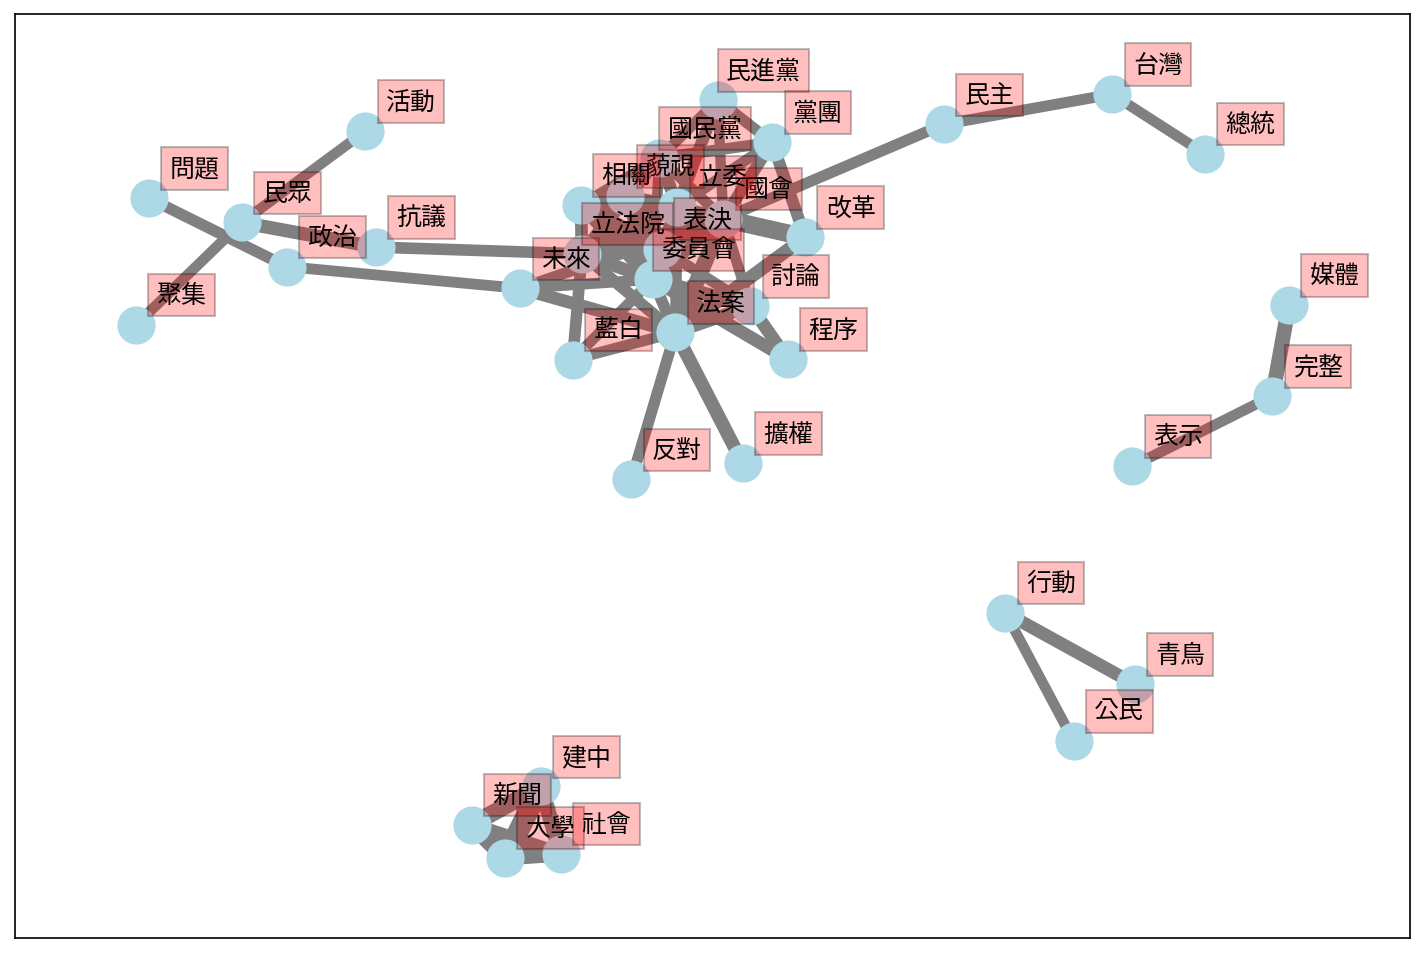

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(g, k=0.3)

# networks
nx.draw_networkx(g, pos,
                 font_size=16,
                 width=weights,
                 edge_color='grey',
                 node_color='lightblue',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=12)

plt.show()

從這張pearson correlation可以看出中間群是國會裡藍白跟綠在爭吵國會法案的修改以及很明顯看到是反對的<br>
左側則是民眾在國會外聚集抗爭的議題其中包括大學生<br>
左下則是講述青島行動以及媒體的報導<br>
左上可以發現建中大學等關鍵字,是這場行動的餐與者

#網路圖

##篩選從青島學運開始前的資料並隨機抽取1/4

In [60]:
!pip install numpy
!pip install pyvis
!pip install networkx
!pip install IPython
import pandas as pd
import numpy as np
import pyvis
import networkx as nx
import IPython

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.7 MB/s eta 0:00:00


In [61]:
raw_data = pd.read_csv('./社媒期末1(1).csv')
raw_data = raw_data[raw_data.artComment != '[]']

raw_data['artDate']=pd.to_datetime(raw_data['insertedDate'])
raw_data['artDate']=raw_data['artDate'].dt.date
raw_data=raw_data.drop(columns=['insertedDate'])

start_date = pd.to_datetime('2024-05-18').date()
end_date = pd.to_datetime('2024-05-27').date()

filter_net = raw_data[raw_data['artDate'].apply(lambda x: start_date <= x <= end_date)]
filter_net=filter_net.sample(round(raw_data.shape[0]/4),random_state=2024)
filter_net.head(5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-61-3bbbbbb9756e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['artDate']=pd.to_datetime(raw_data['insertedDate'])
<ipython-input-61-3bbbbbb9756e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

system_id                                             artUrl  \
475         476  https://www.ptt.cc/bbs/Gossiping/M.1716545960....   
1493       1494  https://www.ptt.cc/bbs/HatePolitics/M.17165681...   
1455       1456  https://www.ptt.cc/bbs/HatePolitics/M.17165498...   
464         465  https://www.ptt.cc/bbs/Gossiping/M.1716544264....   
185         186  https://www.ptt.cc/bbs/Gossiping/M.1716301685....   

                       artTitle     artDate    artPoster   artCatagory  \
475        [問卦]沒人發現青島活動被搞得很low嗎  2024-05-26     oppo5566     Gossiping   
1493     [新聞]轉貼文喊「社運妹最好上」補教老師火速  2024-05-25  oscarwu3041  HatePolitics   
1455        [討論]為何賴總統不去青島現場聲援呢？  2024-05-25       rs6677  HatePolitics   
464        [問卦]八卦怎沒人討論輝達都在講青島東路  2024-05-26  kuangjc5566     Gossiping   
185   Re:[新聞]朝野挑燈夜戰續審國會改革法案萬人擠爆  2024-05-23        doubi     Gossiping   

                                             artContent  \
475   覺青說這是太陽花學運第二\n\n但太陽花那時候有把人跟垃圾連結在一起\n\n還弄個靈堂出來嗎...   
1493  1.新聞網址︰\nhttps://bit.ly/4bUdN3l\n2.新聞來源︰\n自由時報...   
1455  奇怪 這麼重要事件\n民主已死 反黑箱\n又是自己黨發起的\n賴總統 若到青島現場聲援應該士...   
464   八卦的人都不買股票嗎\n這幾天輝達的消息都這麼大了\n股價衝破一千美元\n要一股拆十股\n毛...   
185   藍白真的應該珍惜這個機會,\n\n好好學習民主制度是如何運作的:\n\n- 投票結果不重要,...   

                                             artComment             e_ip  \
475   [{"cmtStatus": "推", "cmtPoster": "ZakkWylde", ...     146.70.42.67   
1493  [{"cmtStatus": "推", "cmtPoster": "ishiyoshi", ...       39.9.62.20   
1455  [{"cmtStatus": "推", "cmtPoster": "j0912970189"...    114.44.152.30   
464   [{"cmtStatus": "推", "cmtPoster": "hcastray", "...    220.138.217.5   
185   [{"cmtStatus": "推", "cmtPoster": "REALJOINGO",...  123.195.202.146   

     dataSource  
475         ptt  
1493        ptt  
1455        ptt  
464         ptt  
185         ptt

In [62]:
sort1=filter_net.sort_values(by='artDate',ascending=True)
sort1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
36           37  https://www.ptt.cc/bbs/Gossiping/M.1715967124....   
1155       1156  https://www.ptt.cc/bbs/HatePolitics/M.17159624...   
13           14  https://www.ptt.cc/bbs/Gossiping/M.1715958070....   
24           25  https://www.ptt.cc/bbs/Gossiping/M.1715961682....   
19           20  https://www.ptt.cc/bbs/Gossiping/M.1715960133....   
21           22  https://www.ptt.cc/bbs/Gossiping/M.1715960964....   
34           35  https://www.ptt.cc/bbs/Gossiping/M.1715966815....   
4             5  https://www.ptt.cc/bbs/Gossiping/M.1715953050....   
1154       1155  https://www.ptt.cc/bbs/HatePolitics/M.17159623...   
1             2  https://www.ptt.cc/bbs/Gossiping/M.1715906498....   

                         artTitle     artDate     artPoster   artCatagory  \
36             [問卦]2024會有新的學運女神嗎？  2024-05-18  vanattenhove     Gossiping   
1155              [討論]民主自由被藍白破壞了?  2024-05-18       ffreakk  HatePolitics   
13              [問卦]真的有海外中國人支持學運耶  2024-05-18   chaoswarudo     Gossiping   
24                 [問卦]去參加遊行要寫遺書嗎  2024-05-18     Nemophila     Gossiping   
19         [問卦]場外學生居然創Line群組在討論了？  2024-05-18      iahc5566     Gossiping   
21              Re:[問卦]為啥凝聚不了年輕人了  2024-05-18    johnnyjazz     Gossiping   
34    Re:[新聞]柯建銘警告318學運將捲土重來　吳宗憲嗆  2024-05-18     SaibuKani     Gossiping   
4            [問卦]有沒有青島東路鎮江街集合的八卦？  2024-05-18      IronCube     Gossiping   
1154    [討論]ＴＭＤ別等519啦！提早起事~今晚衝立院!  2024-05-18      lovetina  HatePolitics   
1                 Re:[爆卦]民進黨開始鬧事啦  2024-05-18     breathair     Gossiping   

                                             artContent  \
36    如題\n\n十年前有一些被稱為 學運女神的人物\n\n這些女的當時因為外型出眾\n\n在抗議...   
1155  真的好錯亂\n\n現在LIVE還在說\n\n民主自由被藍白破壞了\n\n所以\n\n現在是太...   
13    欸欸\n我阿肥啦\n\n這算在threads的中國紅人了\n人好像在日本\n立場感覺很符合咱...   
24    欸欸 之前在網路上有看到鄉民說當年去太陽花學運時有種慷慨赴義的感覺，出發前她還特別寫了遺書（...   
19    剛剛我朋友傳訊息給我說\n\n被加進517立法院之夜的群組\n\n裡面的人正在號召前進青島東...   
21    這就是我為什麼度籃這群太陽花學運的背骨仔\n尤其是那個薪水跟弗利札一樣三段半身的垃圾公子~\...   
34    上個月嗆學運會卷土重來\n\n柯總召是不是神預言啊\n\n他怎麼會知道今天真的又集結了\n\...   
4     https://i.imgur.com/4FGUTGd.jpg\nhttps://i.img...   
1154  ＴＭＤ 別等519啦！\n\n今晚就衝立法院啦！\n\n\n"反你們小草國會改革" 的人馬\...   
1     民進黨要演\n丟個民主香腸，拉個布條拍個照\n三五學生衝個場，喊個學運再起\n配合政論每天討...   

                                             artComment             e_ip  \
36    [{"cmtStatus": "推", "cmtPoster": "wpd", "cmtCo...    101.10.10.141   
1155  [{"cmtStatus": "→", "cmtPoster": "s81048112", ...   122.100.74.168   
13    [{"cmtStatus": "→", "cmtPoster": "fantasyth", ...    114.140.96.76   
24    [{"cmtStatus": "噓", "cmtPoster": "narcimeow", ...    59.126.91.141   
19    [{"cmtStatus": "→", "cmtPoster": "moon128", "c...  182.233.137.216   
21    [{"cmtStatus": "→", "cmtPoster": "james732", "...    111.184.25.17   
34    [{"cmtStatus": "推", "cmtPoster": "whiteadam", ...    49.218.90.161   
4     [{"cmtStatus": "推", "cmtPoster": "ptt987654321...  118.168.164.107   
1154  [{"cmtStatus": "推", "cmtPoster": "hjk56789", "...    42.73.214.220   
1     [{"cmtStatus": "推", "cmtPoster": "sexintheair"...     42.76.64.163   

     dataSource  
36          ptt  
1155        ptt  
13          ptt  
24          ptt  
19          ptt  
21          ptt  
34          ptt  
4           ptt  
1154        ptt  
1           ptt

In [63]:
filter_net.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(453, 10)

In [64]:
# parse comment
# 處理某篇文章的所有留言（取出留言者與狀態）
def getComtInfo(com):
  cmters,cmt_statuss = [],[]
  com = eval(com)
  for i in com:
    # print(i)
    cmters.append(i['cmtPoster'])
    cmt_statuss.append(i['cmtStatus'])
  return pd.Series([cmters, cmt_statuss])

filter_net[['artComter','artStatus']] = filter_net['artComment'].apply(lambda r: getComtInfo(r))
filter_net.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
475         476  https://www.ptt.cc/bbs/Gossiping/M.1716545960....   
1493       1494  https://www.ptt.cc/bbs/HatePolitics/M.17165681...   
1455       1456  https://www.ptt.cc/bbs/HatePolitics/M.17165498...   
464         465  https://www.ptt.cc/bbs/Gossiping/M.1716544264....   
185         186  https://www.ptt.cc/bbs/Gossiping/M.1716301685....   

                       artTitle     artDate    artPoster   artCatagory  \
475        [問卦]沒人發現青島活動被搞得很low嗎  2024-05-26     oppo5566     Gossiping   
1493     [新聞]轉貼文喊「社運妹最好上」補教老師火速  2024-05-25  oscarwu3041  HatePolitics   
1455        [討論]為何賴總統不去青島現場聲援呢？  2024-05-25       rs6677  HatePolitics   
464        [問卦]八卦怎沒人討論輝達都在講青島東路  2024-05-26  kuangjc5566     Gossiping   
185   Re:[新聞]朝野挑燈夜戰續審國會改革法案萬人擠爆  2024-05-23        doubi     Gossiping   

                                             artContent  \
475   覺青說這是太陽花學運第二\n\n但太陽花那時候有把人跟垃圾連結在一起\n\n還弄個靈堂出來嗎...   
1493  1.新聞網址︰\nhttps://bit.ly/4bUdN3l\n2.新聞來源︰\n自由時報...   
1455  奇怪 這麼重要事件\n民主已死 反黑箱\n又是自己黨發起的\n賴總統 若到青島現場聲援應該士...   
464   八卦的人都不買股票嗎\n這幾天輝達的消息都這麼大了\n股價衝破一千美元\n要一股拆十股\n毛...   
185   藍白真的應該珍惜這個機會,\n\n好好學習民主制度是如何運作的:\n\n- 投票結果不重要,...   

                                             artComment             e_ip  \
475   [{"cmtStatus": "推", "cmtPoster": "ZakkWylde", ...     146.70.42.67   
1493  [{"cmtStatus": "推", "cmtPoster": "ishiyoshi", ...       39.9.62.20   
1455  [{"cmtStatus": "推", "cmtPoster": "j0912970189"...    114.44.152.30   
464   [{"cmtStatus": "推", "cmtPoster": "hcastray", "...    220.138.217.5   
185   [{"cmtStatus": "推", "cmtPoster": "REALJOINGO",...  123.195.202.146   

     dataSource                                          artComter  \
475         ptt  [ZakkWylde, elec1141, miacp, OPPAISuki, catkin...   
1493        ptt  [ishiyoshi, maga0525, DustToDust, ken121, fdtu...   
1455        ptt  [j0912970189, DrizztMon, RAA1144557, ALAN78121...   
464         ptt    [hcastray, lwt501cx, johnhmj, goldhan, goldhan]   
185         ptt  [REALJOINGO, agou, cosplay314, cosplay314, rom...   

                                              artStatus  
475   [推, →, 推, →, 推, 推, →, 推, 推, →, 推, 推, 噓, 推, →, ...  
1493  [推, 推, →, →, →, 推, →, 推, 推, 推, →, 推, 推, →, →, ...  
1455                  [推, →, →, →, →, 推, →, →, →, 推, →]  
464                                     [推, 推, 推, 推, →]  
185   [推, 推, →, →, 推, →, →, 推, →, →, 推, →, 推, →, →, ...

In [65]:
#留言展開
filter_net = filter_net.explode(['artComter','artStatus'])
filter_net = filter_net[['artUrl','artPoster','artComter','artStatus']]
filter_net.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl artPoster   artComter  \
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566   ZakkWylde   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566    elec1141   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566       miacp   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566   OPPAISuki   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566  catking015   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566      vig077   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566  catking015   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566     sammy98   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566  mscmobitai   
475  https://www.ptt.cc/bbs/Gossiping/M.1716545960....  oppo5566     xup654z   

    artStatus  
475         推  
475         →  
475         推  
475         →  
475         推  
475         推  
475         →  
475         推  
475         推  
475         →

In [66]:
#建立邊的資料
import random
random.seed(2024)

# 發文者對文章
po_df = filter_net[['artPoster','artUrl']].drop_duplicates().rename(columns = {'artPoster':'src','artUrl':'dis'})
sample_url = random.choices(po_df.dis.unique().tolist(),k=100)
po_df = po_df[po_df.dis.isin(sample_url)]
#Po有87篇
# 留言者對文章，狀態為 weight
re_df = filter_net[['artComter','artUrl','artStatus']].rename(columns = {'artComter':'src','artUrl':'dis','artStatus':'weight'})
re_df = re_df[re_df.dis.isin(sample_url)]
re_df = re_df[~re_df['src'].isna()]
re_df.head()
re_df.shape[0]
#6370則留言

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6370

In [67]:
po_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(87, 2)

In [68]:
re_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


src                                                dis weight
1493   ishiyoshi  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      推
1493    maga0525  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      推
1493  DustToDust  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      →
1493      ken121  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      →
1493    fdtu0928  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      →
1493     ck97756  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      推
1493      brella  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      →
1493  NightxFrog  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      推
1493     rickcoo  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      推
1493   sinon0123  https://www.ptt.cc/bbs/HatePolitics/M.17165681...      推

###計算留言對文章評論分數
發文者和留言者的關係


In [69]:
def convertStatus(s):
  if s == '推':
    return 2
  elif s == '→':
    return 1
  else :
    return -1
re_df['weight'] = re_df['weight'].map(convertStatus)
# 計算某位留言者對某篇文章的總分數
re_df = re_df.groupby(['src','dis']).sum().reset_index()
re_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


src                                                dis  weight
0        AAcrossBB  https://www.ptt.cc/bbs/Gossiping/M.1715974976....       2
1        AAcrossBB  https://www.ptt.cc/bbs/Gossiping/M.1716694575....       2
2        AFROGUNSO  https://www.ptt.cc/bbs/Gossiping/M.1716371902....      -1
3             AIIT  https://www.ptt.cc/bbs/Gossiping/M.1716576534....       2
4       ALAN781215  https://www.ptt.cc/bbs/HatePolitics/M.17165459...       1
...            ...                                                ...     ...
4119       zzzyyan  https://www.ptt.cc/bbs/Gossiping/M.1716557624....       1
4120      zzzzaaaa  https://www.ptt.cc/bbs/Gossiping/M.1716371902....       3
4121      zzzzaaaa  https://www.ptt.cc/bbs/Gossiping/M.1716440655....       1
4122  zzzzzzzzzzzy  https://www.ptt.cc/bbs/HatePolitics/M.17160503...       2
4123  zzzzzzzzzzzy  https://www.ptt.cc/bbs/HatePolitics/M.17165639...       1

[4124 rows x 3 columns]

In [70]:
re_df=re_df.sample(n=1000,random_state=1,replace=True)
re_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


src                                                dis  weight
235         Evoque  https://www.ptt.cc/bbs/Gossiping/M.1716694575....       2
3980       xregion  https://www.ptt.cc/bbs/HatePolitics/M.17165352...       2
905      alanjiang  https://www.ptt.cc/bbs/HatePolitics/M.17166380...       2
2763     ming60406  https://www.ptt.cc/bbs/Gossiping/M.1716694575....       2
2895         notea  https://www.ptt.cc/bbs/HatePolitics/M.17161072...       2
...            ...                                                ...     ...
1671  exceedMyself  https://www.ptt.cc/bbs/Gossiping/M.1716619495....       2
2767       mis1114  https://www.ptt.cc/bbs/Gossiping/M.1715974976....       2
1795   fulongb210f  https://www.ptt.cc/bbs/Gossiping/M.1715974976....       2
2447       kobeday  https://www.ptt.cc/bbs/Gossiping/M.1716106199....      -1
3008      percy921  https://www.ptt.cc/bbs/HatePolitics/M.17166456...       1

[1000 rows x 3 columns]

In [71]:
# 設定分數低的為紅色
def getColor(w):
  if w>0:
    return 'green'
  else:
    return 'red'
re_df['color'] = re_df.weight.map(getColor)
re_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


src                                                dis  weight  \
235         Evoque  https://www.ptt.cc/bbs/Gossiping/M.1716694575....       2   
3980       xregion  https://www.ptt.cc/bbs/HatePolitics/M.17165352...       2   
905      alanjiang  https://www.ptt.cc/bbs/HatePolitics/M.17166380...       2   
2763     ming60406  https://www.ptt.cc/bbs/Gossiping/M.1716694575....       2   
2895         notea  https://www.ptt.cc/bbs/HatePolitics/M.17161072...       2   
...            ...                                                ...     ...   
1671  exceedMyself  https://www.ptt.cc/bbs/Gossiping/M.1716619495....       2   
2767       mis1114  https://www.ptt.cc/bbs/Gossiping/M.1715974976....       2   
1795   fulongb210f  https://www.ptt.cc/bbs/Gossiping/M.1715974976....       2   
2447       kobeday  https://www.ptt.cc/bbs/Gossiping/M.1716106199....      -1   
3008      percy921  https://www.ptt.cc/bbs/HatePolitics/M.17166456...       1   

      color  
235   green  
3980  green  
905   green  
2763  green  
2895  green  
...     ...  
1671  green  
2767  green  
1795  green  
2447    red  
3008  green  

[1000 rows x 4 columns]

In [72]:
#國會三讀青島前的網路圖
# 建立一個網路圖
netWork = pyvis.network.Network(notebook=True, cdn_resources='in_line',directed=True)
# 所有發文者＋留言者
person = list(set(po_df.src.unique().tolist()+re_df.src.unique().tolist()))
url = po_df.dis.unique().tolist()
# # 加入節點（人）
netWork.add_nodes(
    nodes = person,
    value = [1 for i in range(len(person))],
    color = ['#66CDAA' for i in range(len(person))],
    title = person
)
# # 加入節點（文章）
netWork.add_nodes(
    nodes = url,
    value = [2 for i in range(len(url))],
    color = ['#FFB366' for i in range(len(url))],
    title = url
)

# # 加入邊（發文者 -> 文章），使用灰色邊的人節點是發文者
for i in po_df.to_numpy():
  netWork.add_edge(i[0],i[1],width = 2,color='grey')
# # 加入邊（留言者 -> 文章），顏色為某發文者對該文章的總分（>0:綠; <=0:紅）
#轉為numpy再跑迴圈比較快
for i in re_df.to_numpy():
  netWork.add_edge(i[0],i[1],width = 2,color=i[3])

# # 設定layout，圖節點之間的斥力
netWork.repulsion()

netWork.show("./basic_netWork.html")
netWork.save_graph("./basic_netWork.html")
IPython.display.HTML('basic_netWork.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


./basic_netWork.html


1.  上述最大的圓抓取出來察看發現是八卦版的文章,內文在探討一篇新聞報導抗議民眾將黃國昌做成梗圖並且嘲笑譏諷甚至將他放上遺照的照片有詛咒的意味,底下留言則紛紛在嘲諷綠營的此舉動
2.   再查看紅色線較多的噓聲文章,也是八卦版的文章，標題為10萬人怒吼藍白黑箱擴權！賴清德：人民基本權利不能任意侵犯，底下則是滿滿，底下則是滿滿嘲諷民進黨稱40%>60%可以推斷為藍白居多




##篩選青島學運完之後的討論資料

In [73]:
after_df=raw_data.copy()
after_df['artDate']=pd.to_datetime(after_df['artDate'])
after_df['artDate']=after_df['artDate'].dt.date


start_date1 = pd.to_datetime('2024-05-28').date()
end_date1 = pd.to_datetime('2024-06-03').date()

after_df = after_df[after_df['artDate'].apply(lambda x: start_date1 <= x <= end_date1)]
after_df
# after_df=after_df.sample(round(after_df.shape[0]),random_state=2024)
# after_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
777         778  https://www.ptt.cc/bbs/Gossiping/M.1716725448....   
778         779  https://www.ptt.cc/bbs/Gossiping/M.1716725595....   
779         780  https://www.ptt.cc/bbs/Gossiping/M.1716726375....   
780         781  https://www.ptt.cc/bbs/Gossiping/M.1716727541....   
781         782  https://www.ptt.cc/bbs/Gossiping/M.1716728009....   
...         ...                                                ...   
1807       1808  https://www.ptt.cc/bbs/HatePolitics/M.17173047...   
1808       1809  https://www.ptt.cc/bbs/HatePolitics/M.17173191...   
1809       1810  https://www.ptt.cc/bbs/HatePolitics/M.17173230...   
1810       1811  https://www.ptt.cc/bbs/HatePolitics/M.17173424...   
1811       1812  https://www.ptt.cc/bbs/HatePolitics/M.17173491...   

                       artTitle     artDate     artPoster   artCatagory  \
777      [問卦]5/28不載姪女去青島東我會被舉報嗎  2024-05-28       Skydier     Gossiping   
778   Re:[新聞]小草臥底青島東「蹭吃蹭喝」？苦苓嗆：  2024-05-28     l11111111     Gossiping   
779           Re:[問卦]謝謝學運讓我有博愛座  2024-05-28     drmartens     Gossiping   
780   Re:[新聞]小草臥底青島東「蹭吃蹭喝」？苦苓嗆：  2024-05-28   EstelleRinz     Gossiping   
781                [問卦]學運說得沒錯吧！  2024-05-28  Kobemail5566     Gossiping   
...                         ...         ...           ...           ...   
1807      [討論]王義川事件，問題根源是電信業者吧？  2024-06-03      lewlewbo  HatePolitics   
1808        [黑特]為什麼精障哥布林可以那麼死忠？  2024-06-03  polestar0505  HatePolitics   
1809   [討論]蔡英文2012年敗選後是怎麼保持人氣的？  2024-06-03        kcbill  HatePolitics   
1810  Re:[新聞]預告會有「綠版馬王政爭」　柯文哲：看  2024-06-03      aass5566  HatePolitics   
1811     [討論]為什麼塔綠班沒工作，只能去青島東面試  2024-06-03    appledavid  HatePolitics   

                                             artContent  \
777   安各位\n本魯大肚山下智久\n\n這禮拜二有事要開車到三重找大哥\n姪女知道後問我禮拜二可不...   
778   先不講這些物資有多少是納稅錢啦\n\n我們人到現場 吃點東西 是怎麼了嗎？\n\n\n到現場...   
779   這篇讓我想到：\nhttps://i.imgur.com/8n07keU.jpeg\nhtt...   
780   吃點東西而已~\n\n這麼小氣的嗎???\n\n這樣不行啊~~\n\n冥禁洞綠共 這麼  雞...   
781   學運的抗議\n\n多數決的暴力\n\n\n沒錯\n\n為什麼少數20%菁英要服從40%的智障...   
...                                                 ...   
1807  雖然這整個爭議是因為民進黨王義川自爆監控抗議民眾。\n\n但這幾天我追蹤這消息，在網路上找到...   
1808  安安\n\n正常人跟死忠的精障哥布林下午好啊\n\n我一直很好奇\n\n政府本來就應當受到監...   
1809  2024年總統敗選人暨民眾黨黨主席柯文哲\n\n自從今年年初敗選後聲量看起來大不如前\n\n...   
1810  其實已經開始了...\n\n  只是型態不見得浮上檯面\n\n  例如這次的青島街活動\n\...   
1811  我發現最近活動有個特徵\n\n①藍白在家吹冷氣\n\n②塔綠班跑去淋雨\n\n③藍白在家看投...   

                                             artComment             e_ip  \
777   [{"cmtStatus": "→", "cmtPoster": "libraayu", "...     1.170.90.191   
778   [{"cmtStatus": "推", "cmtPoster": "wingstar", "...   36.230.174.252   
779   [{"cmtStatus": "→", "cmtPoster": "applebird", ...  114.136.186.167   
780   [{"cmtStatus": "推", "cmtPoster": "peterwww", "...   36.239.242.202   
781   [{"cmtStatus": "→", "cmtPoster": "OPPAISuki", ...   223.143.208.97   
...                                                 ...              ...   
1807  [{"cmtStatus": "推", "cmtPoster": "metro721", "...     101.10.44.19   
1808  [{"cmtStatus": "推", "cmtPoster": "CavendishJr"...    42.77.186.156   
1809  [{"cmtStatus": "推", "cmtPoster": "flavorBZ", "...     90.213.149.5   
1810  [{"cmtStatus": "推", "cmtPoster": "MilkTeaMan",...    118.233.32.68   
1811  [{"cmtStatus": "推", "cmtPoster": "MyDice", "cm...      1.164.31.70   

     dataSource  
777         ptt  
778         ptt  
779         ptt  
780         ptt  
781         ptt  
...         ...  
1807        ptt  
1808        ptt  
1809        ptt  
1810        ptt  
1811        ptt  

[524 rows x 10 columns]

In [74]:
sort=after_df.sort_values(by='artDate')
sort.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


system_id                                             artUrl  \
777         778  https://www.ptt.cc/bbs/Gossiping/M.1716725448....   
1678       1679  https://www.ptt.cc/bbs/HatePolitics/M.17168129...   
1677       1678  https://www.ptt.cc/bbs/HatePolitics/M.17168117...   
1676       1677  https://www.ptt.cc/bbs/HatePolitics/M.17168111...   
1626       1627  https://www.ptt.cc/bbs/HatePolitics/M.17167465...   
1627       1628  https://www.ptt.cc/bbs/HatePolitics/M.17167466...   
1628       1629  https://www.ptt.cc/bbs/HatePolitics/M.17167491...   
1679       1680  https://www.ptt.cc/bbs/HatePolitics/M.17168152...   
1629       1630  https://www.ptt.cc/bbs/HatePolitics/M.17167495...   
1631       1632  https://www.ptt.cc/bbs/HatePolitics/M.17167695...   

                      artTitle     artDate    artPoster   artCatagory  \
777     [問卦]5/28不載姪女去青島東我會被舉報嗎  2024-05-28      Skydier     Gossiping   
1678       [黑特]民進黨承認金援太陽花、反課綱！  2024-05-28    waynecode  HatePolitics   
1677         [討論]明天有摸彩送蘋果才有學生去  2024-05-28  tontontonni  HatePolitics   
1676             [討論]明天攤位有狗糧嗎？  2024-05-28     naligono  HatePolitics   
1626  Re:[討論]一直洗社運妹去捉i的意義在哪裡呀?  2024-05-28   tspes40801  HatePolitics   
1627     Re:[討論]史無前例反學運方去蹭學運食物  2024-05-28   fraternity  HatePolitics   
1628     [討論]可以繼續鄙視524青鳥行動，沒關係  2024-05-28     damonwhk  HatePolitics   
1679            [討論]明天沒有青島夜市了?  2024-05-28  jerrychuang  HatePolitics   
1629     Re:[討論]史無前例反學運方去蹭學運食物  2024-05-28     pupuliao  HatePolitics   
1631  Re:[討論]可以繼續鄙視524青鳥行動，沒關係  2024-05-28       kousun  HatePolitics   

                                             artContent  \
777   安各位\n本魯大肚山下智久\n\n這禮拜二有事要開車到三重找大哥\n姪女知道後問我禮拜二可不...   
1678  幹\n \n我也是第一次看到想說幹這怎麼可能\n還以為民進黨管不到太陽花、也管不到反課綱學運...   
1677  528政黑都沒熱度了，還靠我貢獻2篇，\n\n明天人潮勢必涼了\n\n我看524小草貼的各式...   
1676  想說明天青島攤位有發罐罐或狗糧的話\n\n我就順便把我的民主哈士奇帶去遛一遛\n\n讓國蔥\...   
1626  什麼戰國策一直洗，明明就台派側翼想用直男癌邏輯嗆小草避孕器交不到女友，結果大翻\n車，被th...   
1627  真的\n有夠沒品的\n到底為什麼要去別人的場子拿食物\n快氣死\n\n\n\n\n\n\n\...   
1628  政黑版、藍營政治人物一直認為524是民進黨因為輸不起所動員出來的，\n\n可以一直抱持著這樣...   
1679  天啊\n卓院長一出手\n就知有沒有\n\n青島夜市明天要直接被放生?\n那廣大的民眾明天晚餐...   
1629  哀\n這些小草真的很可憐阿\n每天七點半上班就算了，還要自願捐加班費給老闆\n動員集會還要自...   
1631  喔是喔真的假的\n\n柯建銘自己都說了 太陽花就是他們搞的\n\n4月多也暗示這波學運他們正...   

                                             artComment             e_ip  \
777   [{"cmtStatus": "→", "cmtPoster": "libraayu", "...     1.170.90.191   
1678  [{"cmtStatus": "→", "cmtPoster": "DustToDust",...   118.161.20.161   
1677  [{"cmtStatus": "→", "cmtPoster": "brella", "cm...  202.188.212.118   
1676  [{"cmtStatus": "→", "cmtPoster": "brella", "cm...  114.137.171.202   
1626  [{"cmtStatus": "→", "cmtPoster": "zeuswell", "...    42.75.210.148   
1627  [{"cmtStatus": "→", "cmtPoster": "BBQman", "cm...     27.53.144.81   
1628  [{"cmtStatus": "噓", "cmtPoster": "BBQman", "cm...   111.250.39.172   
1679  [{"cmtStatus": "→", "cmtPoster": "scimonster",...  118.160.154.141   
1629  [{"cmtStatus": "推", "cmtPoster": "DustToDust",...    118.160.72.77   
1631  [{"cmtStatus": "推", "cmtPoster": "PyTorch", "c...   223.140.198.29   

     dataSource  
777         ptt  
1678        ptt  
1677        ptt  
1676        ptt  
1626        ptt  
1627        ptt  
1628        ptt  
1679        ptt  
1629        ptt  
1631        ptt

In [75]:
after_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(524, 10)

In [76]:
after_df.shape
#取出留言狀態
after_df[['artComter','artStatus']] = after_df['artComment'].apply(lambda r: getComtInfo(r))
after_df.head()
#建立邊的資料
import random
random.seed(2024)

#留言展開
after_df = after_df.explode(['artComter','artStatus'])
after_df = after_df[['artUrl','artPoster','artComter','artStatus']]
after_df.head(10)

# 發文者對文章
po_df1 = after_df[['artPoster','artUrl']].drop_duplicates().rename(columns = {'artPoster':'src','artUrl':'dis'})
sample_url1 = random.choices(po_df1.dis.unique().tolist(),k=100)
po_df1 = po_df1[po_df1.dis.isin(sample_url1)]
#Po有89篇
# 留言者對文章，狀態為 weight
re_df1 = after_df[['artComter','artUrl','artStatus']].rename(columns = {'artComter':'src','artUrl':'dis','artStatus':'weight'})
re_df1 = re_df1[re_df1.dis.isin(sample_url1)]
re_df1 = re_df1[~re_df1['src'].isna()]
re_df1.head()

#re8450則留言

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


src                                                dis weight
779     applebird  https://www.ptt.cc/bbs/Gossiping/M.1716726375....      →
779     applebird  https://www.ptt.cc/bbs/Gossiping/M.1716726375....      →
779       kch0520  https://www.ptt.cc/bbs/Gossiping/M.1716726375....      →
779        gekkou  https://www.ptt.cc/bbs/Gossiping/M.1716726375....      推
779  adamyang2000  https://www.ptt.cc/bbs/Gossiping/M.1716726375....      →

In [77]:
po_df1.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(90, 2)

In [78]:
re_df1.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5680, 3)

In [79]:
#計算留言者對文章的評論分數
re_df1['weight'] = re_df1['weight'].map(convertStatus)
# 計算某位留言者對某篇文章的總分數
re_df1 = re_df1.groupby(['src','dis']).sum().reset_index()
re_df1=re_df1.sample(n=1000,random_state=1,replace=True)
#設定分數
re_df1['color'] = re_df1.weight.map(getColor)
re_df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


src                                                dis  weight  \
1061    canallchen  https://www.ptt.cc/bbs/HatePolitics/M.17173230...       1   
235         GEoilo  https://www.ptt.cc/bbs/Gossiping/M.1716743537....       1   
1096   changrabbit  https://www.ptt.cc/bbs/HatePolitics/M.17169413...       3   
905       b2305911  https://www.ptt.cc/bbs/Gossiping/M.1716781145....       2   
2763      sindy520  https://www.ptt.cc/bbs/Gossiping/M.1716884174....       1   
...            ...                                                ...     ...   
1718  insidelonely  https://www.ptt.cc/bbs/Gossiping/M.1716771985....       1   
2958          tmgl  https://www.ptt.cc/bbs/Gossiping/M.1716906548....       2   
2493     pupu20317  https://www.ptt.cc/bbs/HatePolitics/M.17169413...       6   
1704       inderal  https://www.ptt.cc/bbs/Gossiping/M.1716891263....       2   
753          aibon  https://www.ptt.cc/bbs/Gossiping/M.1716872104....       2   

      color  
1061  green  
235   green  
1096  green  
905   green  
2763  green  
...     ...  
1718  green  
2958  green  
2493  green  
1704  green  
753   green  

[1000 rows x 4 columns]

In [80]:
#國會三讀青島後的網路圖
# 建立一個網路圖
netWork = pyvis.network.Network(notebook=True, cdn_resources='in_line',directed=True)
# 所有發文者＋留言者
person1 = list(set(po_df1.src.unique().tolist()+re_df1.src.unique().tolist()))
url1 = po_df1.dis.unique().tolist()
# # 加入節點（人）
netWork.add_nodes(
    nodes = person1,
    value = [1 for i in range(len(person1))],
    color = ['#66CDAA' for i in range(len(person1))],
    title = person1
)
# # 加入節點（文章）
netWork.add_nodes(
    nodes = url1,
    value = [2 for i in range(len(url1))],
    color = ['#FFB366' for i in range(len(url1))],
    title = url1
)

# # 加入邊（發文者 -> 文章），使用灰色邊的人節點是發文者
for i in po_df1.to_numpy():
  netWork.add_edge(i[0],i[1],width = 2,color='grey')
# # 加入邊（留言者 -> 文章），顏色為某發文者對該文章的總分（>0:綠; <=0:紅）
#轉為numpy再跑迴圈比較快
for i in re_df1.to_numpy():
  netWork.add_edge(i[0],i[1],width = 2,color=i[3])

# # 設定layout，圖節點之間的斥力
netWork.repulsion()

netWork.show("./basic_netWork.html")
netWork.save_graph("./basic_netWork1.html")
IPython.display.HTML('basic_netWork.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


./basic_netWork.html




*   這邊抓取出最大關注的文章發現說此篇在國會三讀通過當天並且在討論學運現場的各種食物發現很豐盛會提供不只漢堡包子還有零食,此篇為八卦版雖然底下有些在嘲諷綠色有些則是有在討論食物的豐盛度表示自己也想去吃




##網友之間關係

In [81]:
pos_cmt = filter_net.sample(round(raw_data.shape[0]/2),random_state=2024,replace=True).copy()
pos_cmt = pos_cmt[~pos_cmt.artComter.isna()]
pos_cmt.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artUrl   artPoster  \
162   https://www.ptt.cc/bbs/Gossiping/M.1716293722....     STi2011   
1167  https://www.ptt.cc/bbs/HatePolitics/M.17159873...     mathbug   
1446  https://www.ptt.cc/bbs/HatePolitics/M.17165455...    a1223356   
1260  https://www.ptt.cc/bbs/HatePolitics/M.17162925...    LeeSeDol   
1368  https://www.ptt.cc/bbs/HatePolitics/M.17164597...        boyo   
485   https://www.ptt.cc/bbs/Gossiping/M.1716549848....      TRFgee   
744   https://www.ptt.cc/bbs/Gossiping/M.1716698198....    moneybuy   
34    https://www.ptt.cc/bbs/Gossiping/M.1715966815....   SaibuKani   
219   https://www.ptt.cc/bbs/Gossiping/M.1716312693....  goatcheese   
713   https://www.ptt.cc/bbs/Gossiping/M.1716649792....    devidevi   

         artComter artStatus  
162         ggttoo         →  
1167         giabu         推  
1446    DustToDust         →  
1260  troubledanny         →  
1368        Noback         →  
485        Mandara         →  
744      Tiphareth         →  
34     summer68101         →  
219         wds824         →  
713     calvin0319         推

In [82]:
pos_cmt['score'] = pos_cmt['artStatus'].apply(lambda r: convertStatus(r)) #轉換成分數

# 某留言者對某發文者的總分
pos_cmt = pos_cmt.groupby(['artComter','artPoster']).sum('score').reset_index()
pos_cmt = pos_cmt[pos_cmt.score>=0]
pos_cmt = pos_cmt[pos_cmt.artComter != pos_cmt.artPoster]
# pos_cmt.score = 1
pos_cmt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artComter   artPoster  score
1         AWPER     sera520      2
2     Achillies    devidevi      2
3     AioTakumi     sera520      1
6         Anvec  nick55chen      1
7    Arthurseed   waynecode      1
..          ...         ...    ...
853    zeuswell        boyo      2
854    zhugejin    pds3601o      1
855      zjeff1    D600dust      2
856    zsrd5566    IronCube      1
857    zsrd5566   hydra6716      1

[753 rows x 3 columns]

In [83]:
#利用上表pos_cmt 做出pivot table
#左列留言者對上欄各文章發文者的分數
mat = pd.pivot_table(pos_cmt,index = 'artComter', columns = 'artPoster' ,values='score').fillna(0)
mat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


artPoster    A6  AgentSkye56  Andosinjo  Angels5566  Atima  August2006  BMWi3  \
artComter                                                                       
AWPER       0.0          0.0        0.0         0.0    0.0         0.0    0.0   
Achillies   0.0          0.0        0.0         0.0    0.0         0.0    0.0   
AioTakumi   0.0          0.0        0.0         0.0    0.0         0.0    0.0   
Anvec       0.0          0.0        0.0         0.0    0.0         0.0    0.0   
Arthurseed  0.0          0.0        0.0         0.0    0.0         0.0    0.0   
...         ...          ...        ...         ...    ...         ...    ...   
z23061542   0.0          0.0        0.0         0.0    0.0         0.0    0.0   
zeuswell    0.0          0.0        0.0         0.0    0.0         0.0    0.0   
zhugejin    0.0          0.0        0.0         0.0    0.0         0.0    0.0   
zjeff1      0.0          0.0        0.0         0.0    0.0         0.0    0.0   
zsrd5566    0.0          0.0        0.0         0.0    0.0         0.0    0.0   

artPoster   Beatrice322  Borges  CCRun  ...  william8403  words2012  wrwking  \
artComter                               ...                                    
AWPER               0.0     0.0    0.0  ...          0.0        0.0      0.0   
Achillies           0.0     0.0    0.0  ...          0.0        0.0      0.0   
AioTakumi           0.0     0.0    0.0  ...          0.0        0.0      0.0   
Anvec               0.0     0.0    0.0  ...          0.0        0.0      0.0   
Arthurseed          0.0     0.0    0.0  ...          0.0        0.0      0.0   
...                 ...     ...    ...  ...          ...        ...      ...   
z23061542           0.0     0.0    0.0  ...          0.0        0.0      0.0   
zeuswell            0.0     0.0    0.0  ...          0.0        0.0      0.0   
zhugejin            0.0     0.0    0.0  ...          0.0        0.0      0.0   
zjeff1              0.0     0.0    0.0  ...          0.0        0.0      0.0   
zsrd5566            0.0     0.0    0.0  ...          0.0        0.0      0.0   

artPoster   x5723  xa9277178  yofa  yuyugh2015  zakijudelo  zpeople0116  \
artComter                                                                 
AWPER         0.0        0.0   0.0         0.0         0.0          0.0   
Achillies     0.0        0.0   0.0         0.0         0.0          0.0   
AioTakumi     0.0        0.0   0.0         0.0         0.0          0.0   
Anvec         0.0        0.0   0.0         0.0         0.0          0.0   
Arthurseed    0.0        0.0   0.0         0.0         0.0          0.0   
...           ...        ...   ...         ...         ...          ...   
z23061542     0.0        0.0   0.0         0.0         0.0          0.0   
zeuswell      0.0        0.0   0.0         0.0         0.0          0.0   
zhugejin      0.0        0.0   0.0         0.0         0.0          0.0   
zjeff1        0.0        0.0   0.0         0.0         0.0          0.0   
zsrd5566      0.0        0.0   0.0         0.0         0.0          0.0   

artPoster   zzzzzzzzzzzy  
artComter                 
AWPER                0.0  
Achillies            0.0  
AioTakumi            0.0  
Anvec                0.0  
Arthurseed           0.0  
...                  ...  
z23061542            0.0  
zeuswell             0.0  
zhugejin             0.0  
zjeff1               0.0  
zsrd5566             0.0  

[658 rows x 222 columns]

計算網友之間的分數矩陣
*   mat: 有方向性的矩陣，A -> B 分數與 B -> A 分數不一定一樣。
*   mat_s: 無方向性矩陣（互動總分），A -> B 分數 + B -> A 分數

In [84]:
# 所有留言者與發文者
pers = np.unique(pos_cmt[['artComter', 'artPoster']])

# 矩陣中的值 mat[i][j] 代表使用者 pers[i]（留言者）對使用者 pers[j]（發文者）的評分，
# 留言者和發文者之間的關係是有方向的
mat = pd.pivot_table(pos_cmt,index = 'artComter', columns = 'artPoster' ,values='score' ).fillna(0)\
  .reindex(columns=pers, index=pers, fill_value=0).to_numpy()
print(mat.shape)

# 取得所有人與其他人互動分數總和（無方向，兩個方向分數相加）
# 對稱矩陣中的值 mat_s[i][j] 表示使用者 pers[i] 與使用者 pers[j] 之間的互動總分。 pers[i] 對 pers[j] 的評分和 pers[j] 對 pers[i] 的評分相加
# np.tril(mat, -1): 生成一個下三角矩陣（主對角線下方的所有元素，但不包括主對角線）np.triu(mat, 1): 生成一個上三角矩陣（主對角線上方元素，不包括主對角線）
tri = (np.tril(mat,-1).T + np.triu(mat,1))
mat_s = tri+tri.T # 上三角和下三角都包括在內，但對角線是 0
mat_s

(869, 869)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

matPresentGraph()：用來將矩陣轉換為視覺化的網絡圖
*   利用 pyvis 來繪製網絡圖，並設定節點和邊的顏色。

In [85]:
# 隨機分配顏色
def random_color():
  r = lambda: random.randint(0,255)
  return '#%02X%02X%02X' % (r(),r(),r())

def matPresentGraph(mat:np.array, node_id:list, node_type:list=None, node_value:list=None, directed=True, edge_color=None) -> pyvis.network.Network:
  # 有方向或無方向
  if directed != True:
    # 矩陣對稱
    if (mat == mat.transpose()).all():
      print('matrix is Symmetric')
    # 矩陣不對稱
    else:
      print('matrix is not Symmetric')

  # 設定節點的類別及顏色
  # 沒有分節點類別
  if node_type == None:
    c = random_color()
    node_colors = [c for i in range(len(node_id))]
    node_type = [" " for i in range(len(node_id))]
  # 有分節點類別
  else:
    node_color_map = {}
    for i in set(node_type):
      # 幫每個類別產生一個顏色
      while True:
        c = random_color()
        if c not in node_color_map.values():
          break
      node_color_map[i] = c
    node_colors = [node_color_map[i] for i in node_type]
  # print(node_colors)

  # 如果沒有給邊的顏色，隨機產生一個
  if edge_color == None:
    edge_color = random_color()

  # 如果沒有給 node 值，就都分配 1
  if node_value == None:
    node_value = [1 for i in range(len(node_id))]

  # 建立圖
  net = pyvis.network.Network(notebook=True, directed = directed, cdn_resources='in_line')

  titles_list = []
  for i ,j in zip(node_id,node_type):
    titles_list.append(str(i)+":"+str(j))

  net.add_nodes(
      nodes = node_id,
      value = node_value,
      label = node_id,
      title = titles_list,
      color = node_colors
  )

  for row in range(len(node_id)):
    for col in range(len(node_id)):
      if mat[row][col]>0.:
        net.add_edge(
            node_id[row],node_id[col],width = mat[row][col],color = edge_color,title = mat[row][col]
        )
  net.repulsion()
  return net

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


使用Hits score法--網頁重要性指標

*   index page (索引網頁，可以連結到其他網頁)：Hub Score 越高代表連到的 content page 都是 high authority score
*   content page (內容網頁)：authority score 越高代表越多 high hub score 的 index page 指向他


In [93]:
out_,in_ = nx.hits(nx.DiGraph(mat),max_iter=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
out_ = np.array(list(out_.values()))
out_q = np.quantile(out_,[.2,.4,.6,.8])
out_q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-1.49556420e-20,  0.00000000e+00,  1.86523932e-19,  1.21332478e-16])

In [96]:
node_value = []

# 根據 Hub 值設定節點大小
for i in out_:
  if i > out_q[3]:
    node_value.append(25)
  elif i >out_q[2]:
    node_value.append(20)
  elif i>out_q[1]:
    node_value.append(15)
  elif i>out_q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type,node_value=node_value)
net.save_graph("./pers_out_netWork.html")
IPython.display.HTML('pers_out_netWork.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


上述圖可以發現較多人留言的文章,自己的重要程度也越高,node也越大

可以發現indegree/outdegree的多寡會決定其重要程度

Hub得分高的節點在網絡中起著導航作用，指向許多Authority節點；Authority得分高的節點則是被許多Hub節點指向的重要節點。這兩類節點在網絡中的角色不同，但都具有重要意義。

# **結論**


1. 繪製文字雲
事件起因為法案改革導致這場學運，參加者以熱血的學生為主，並且討論民主精神，宛如十年前的太陽花運動，諷刺的是黃國昌在這兩場運動裡都是顯眼角色、但身處相反的立場

2. 情緒分析
討論法案改革的正當性分成支持與反對兩派，網路上的反面聲量較大。
並且透過情緒走勢圖看到，在5/30的網路的正負情緒聲量由原本的負向趨近於0，推測是因為28號法案三讀通過因此討論度下降。

3. 主題模型分析
指定主題數量範圍為2到10，透過困惑度（perplexity）和PMI來評估最佳主題數量，最終選出最佳主題數為3: 政黨、青島遊行、法案本身。
並從統計圖看出5/28的討論主題分布。

4. 字詞相關性
通過分析字詞之間的關係，揭示了藍白與綠營在國會法案修改上的爭議，以及大學生在國會外聚集抗議的情況。

5. 網路圖分析
使用pyvis繪製網絡圖，分析網友之間的互動關係，找出影響力大的關鍵人物。發現一些留言者在多個討論板中進行留言，作為中介者連接不同社群，這些留言者對整個討論具有重要影響。

這次分析顯示了台灣青島學運在PTT社群中的輿情分佈，反映了不同意見的交鋒與討論，也表明了社群用戶對社會事件的高度參與和關注。這些數據和結論對於了解社會運動在網絡社群中的影響具有重要意義。